# Lending group case study



Input as given in the case study

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives


## Risk Analytics for Loan Default Prediction

The company's business objective is to employ Exploratory Data Analysis (EDA) to identify the key driving factors (driver variables) behind loan defaults. By understanding and leveraging these indicators of default, the company aims to enhance its risk assessment and portfolio management strategies, ultimately reducing credit losses and improving its lending practices.

### Importing python packages

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the loan Information CSV File 

In [82]:
loan_df=pd.read_csv("loan_dataset.csv")

### Getting General information of the dataset

In [83]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


##### From the above obersvation we confirm that there are 111 Columns, with the following data types float64(74), int64(13), object(24) and a total of 39717 rows

### Exploring the CSV file to look at the coloumn and row values for starting the data cleaning exercise

In [84]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning for loan dataset

### Exploring Null values in the dataset 

In [85]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

##### Seems like there are some columns where all the values are null

### Now Dropping the columns having all Nullable values

In [86]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Now we calculate the precentage of missing values in each columns

In [87]:
round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [88]:
loan_90_percentage_missing_columns = loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) > 90]
print(loan_90_percentage_missing_columns)
loan_df = loan_df.drop(loan_90_percentage_missing_columns, axis=1)
print(loan_df.shape)

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')
(39717, 55)


##### Now we are left with only 55 coloumns out of 111

In [89]:
loan_df.var()

id                            4.439202e+10
member_id                     7.058496e+10
loan_amnt                     5.560194e+07
funded_amnt                   5.165640e+07
funded_amnt_inv               5.081481e+07
installment                   4.362871e+04
annual_inc                    4.069645e+09
dti                           4.460361e+01
delinq_2yrs                   2.418786e-01
inq_last_6mths                1.145369e+00
mths_since_last_delinq        4.848830e+02
open_acc                      1.936249e+01
pub_rec                       5.626382e-02
revol_bal                     2.523338e+08
total_acc                     1.299990e+02
out_prncp                     1.407547e+05
out_prncp_inv                 1.397447e+05
total_pymnt                   8.175850e+07
total_pymnt_inv               7.997139e+07
total_rec_prncp               4.992160e+07
total_rec_int                 6.802248e+06
total_rec_late_fee            5.314380e+01
recoveries                    4.743694e+05
collection_

In [90]:
loan_df.drop(['collections_12_mths_ex_med', "policy_code",'acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis = 1, inplace = True)


In [91]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

### Now we have 49 columns out of which some correspond to the post approval of loan and ids 

##### We are analyzing the user details and the driving factors of loan defaulting before approving loan.
##### So we can safely remove the columns / variables corresponding to that scenario.
##### Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".
##### The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
* "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
* "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them.
* "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

## List of post-approval features
* delinq_2yrs
* revol_bal
* out_prncp
* total_pymnt
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt
* mths_since_last_delinq
* total_pymnt_inv
* out_prncp_inv
* total_pymnt_inv
* funded_amnt
* total_pymnt


In [92]:
loan_df.drop(['delinq_2yrs', "revol_bal",'out_prncp','mths_since_last_delinq', 'last_pymnt_amnt', 'last_pymnt_d','collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp',"id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d","desc","out_prncp_inv","total_pymnt_inv","funded_amnt","total_pymnt","pub_rec_bankruptcies"], axis = 1, inplace = True)
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,application_type
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,AZ,27.65,Jan-85,1,3,0,83.70%,9,f,INDIVIDUAL
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,GA,1.00,Apr-99,5,3,0,9.40%,4,f,INDIVIDUAL
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,IL,8.72,Nov-01,2,2,0,98.50%,10,f,INDIVIDUAL
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,CA,20.00,Feb-96,1,10,0,21%,37,f,INDIVIDUAL
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,OR,17.94,Jan-96,0,15,0,53.90%,38,f,INDIVIDUAL


In [93]:
loan_df.shape

(39717, 25)

### Seeing Posible loan_status

In [94]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### Fixing the Missing Values 

In [95]:
loan_df.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
pymnt_plan                0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
initial_list_status       0
application_type          0
dtype: int64

#### Now we know that there are some missing values in the coloum emp_length and revol_util

### Dropping null rows from emp_length

In [96]:
loan_df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [97]:
loan_df=loan_df[-(loan_df['emp_length'].isnull())]

In [98]:
loan_df.isnull().sum()

loan_amnt               0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
pymnt_plan              0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util             47
total_acc               0
initial_list_status     0
application_type        0
dtype: int64

### Dropping null rows from revol_util

In [99]:
loan_df['revol_util'].value_counts()

0%        941
0.20%      62
63%        61
66.70%     57
40.70%     57
         ... 
0.83%       1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1087, dtype: int64

In [100]:
loan_df=loan_df[-(loan_df['revol_util'].isnull())]

In [101]:
loan_df.isnull().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
initial_list_status    0
application_type       0
dtype: int64

## Standardising Values

### Standardising values for revol_util

In [102]:
loan_df['revol_util'].value_counts()

0%        941
0.20%      62
63%        61
66.70%     57
40.70%     57
         ... 
0.83%       1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1087, dtype: int64

In [103]:
loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : x.split('%')[0]))

In [104]:
loan_df['revol_util'].value_counts()

0.00     941
0.20      62
63.00     61
66.70     57
40.70     57
        ... 
0.83       1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1087, dtype: int64

##### Values for revol_util has been Standardized

### Standardising values for int_rate

In [105]:
loan_df["int_rate"].value_counts()

10.99%    932
13.49%    813
11.49%    800
7.51%     756
7.88%     701
         ... 
16.33%      1
16.15%      1
16.01%      1
10.64%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [106]:
loan_df["int_rate"] = pd.to_numeric(loan_df["int_rate"].apply(lambda x : x.split('%')[0]))

In [107]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38595 non-null  int64  
 1   funded_amnt_inv      38595 non-null  float64
 2   term                 38595 non-null  object 
 3   int_rate             38595 non-null  float64
 4   installment          38595 non-null  float64
 5   grade                38595 non-null  object 
 6   sub_grade            38595 non-null  object 
 7   emp_length           38595 non-null  object 
 8   home_ownership       38595 non-null  object 
 9   annual_inc           38595 non-null  float64
 10  verification_status  38595 non-null  object 
 11  issue_d              38595 non-null  object 
 12  loan_status          38595 non-null  object 
 13  pymnt_plan           38595 non-null  object 
 14  purpose              38595 non-null  object 
 15  addr_state           38595 non-null 

### Removing Outliers

#### Plotting Box plot for annual_inc

<Axes: >

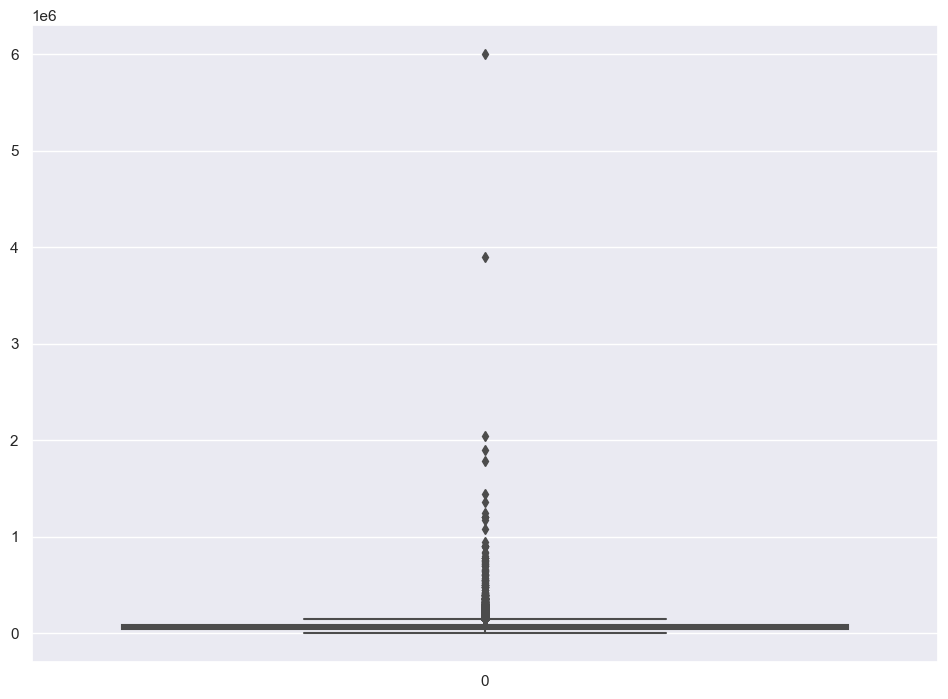

In [108]:
sns.boxplot(loan_df['annual_inc'])

#### Removing all data after the 95 percentile 

In [109]:
quantile_annual_inc = loan_df.annual_inc.quantile([0.95])
quantile_annual_inc

0.95    144000.0
Name: annual_inc, dtype: float64

In [110]:
per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]

<Axes: >

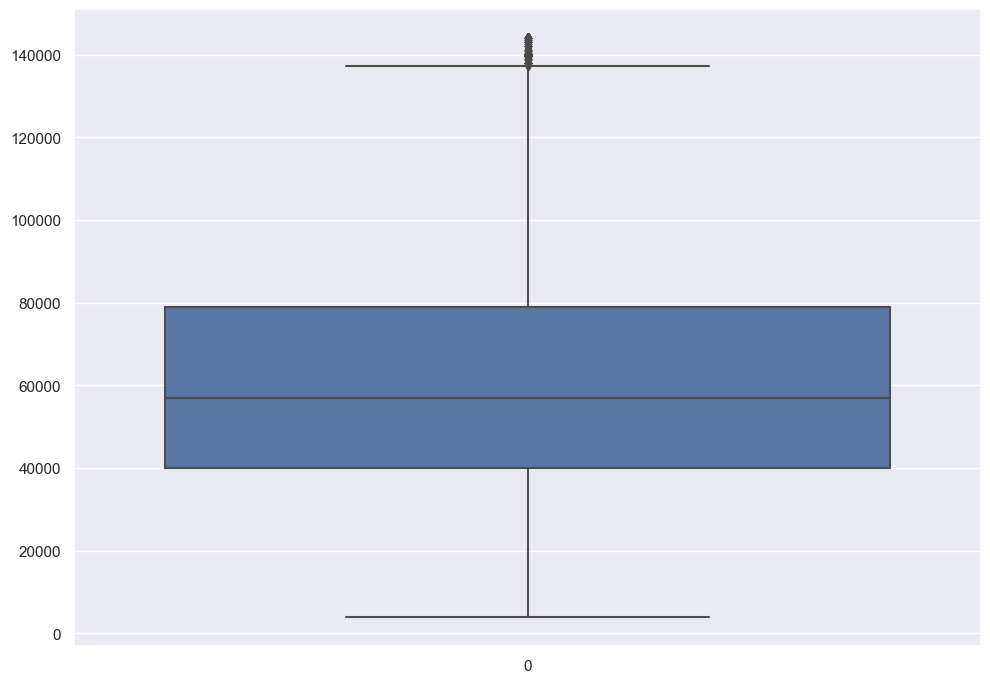

In [111]:
sns.boxplot(loan_df['annual_inc'])

Now the values looks continuous hence we can proceed with the next steps

#### Plotting Box plot for int_rate

<Axes: >

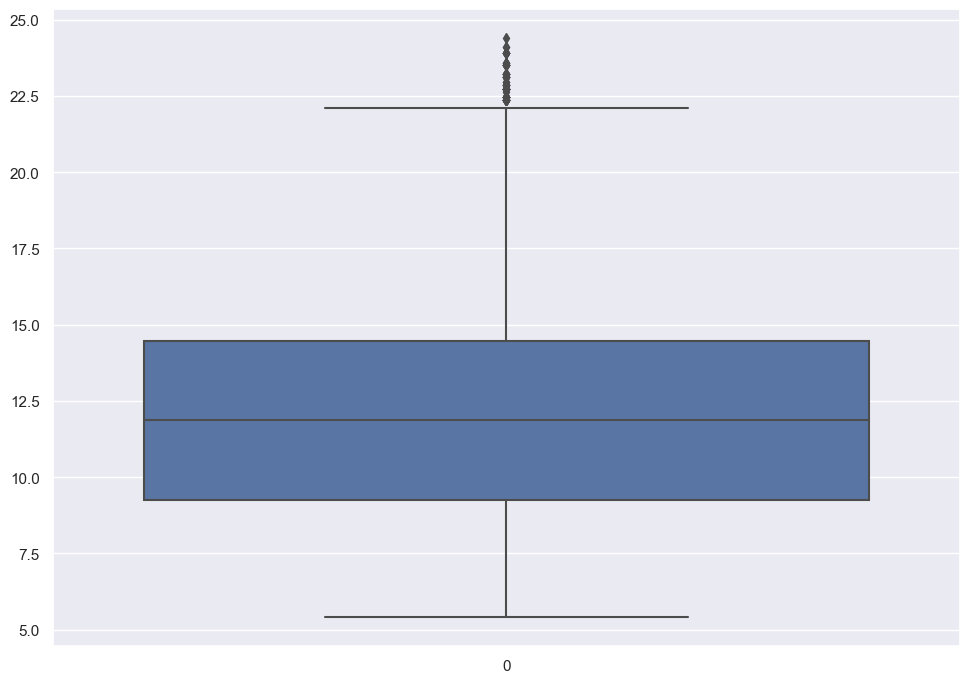

In [112]:
sns.boxplot(loan_df['int_rate'])

The Box plot for int rate looks continuous with minimum number of outliers hence not removing data

#### Plotting Box plot for installment¶

<Axes: >

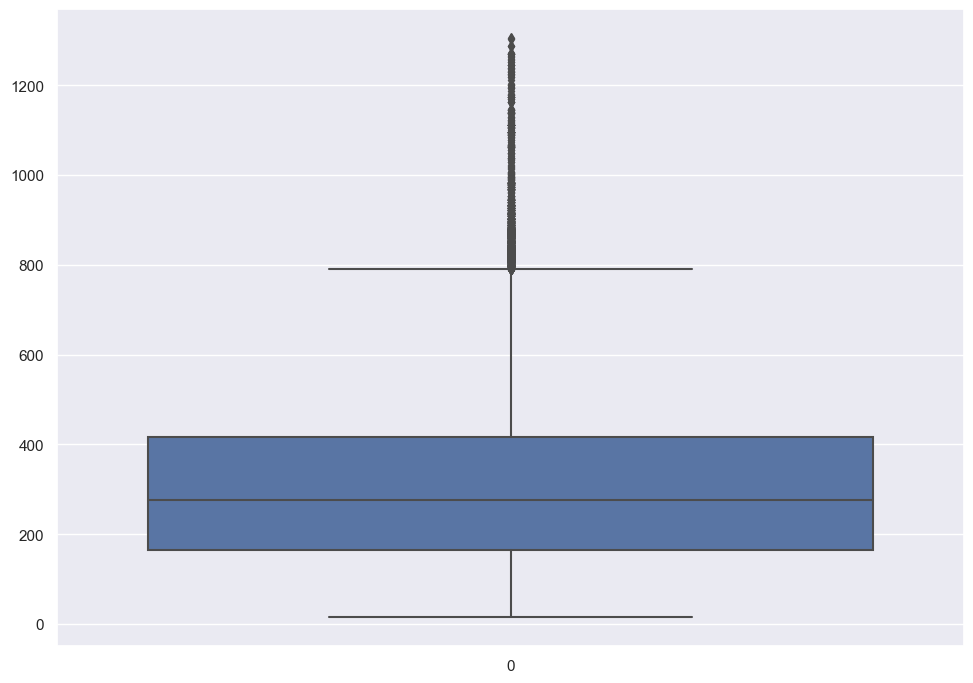

In [113]:
sns.boxplot(loan_df['installment'])

The data is moreover continuous but there seems to be a large number of outliers in the data that needs to be cleared

In [114]:
quantile_installment = loan_df.installment.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_installment

0.50    276.0600
0.75    415.4800
0.90    594.8540
0.95    712.6080
0.97    811.7098
0.98    850.9500
0.99    902.5480
Name: installment, dtype: float64

In [115]:
per_95_installment = loan_df['installment'].quantile(0.95)
dt = loan_df[loan_df.installment <= per_95_installment]

<Axes: >

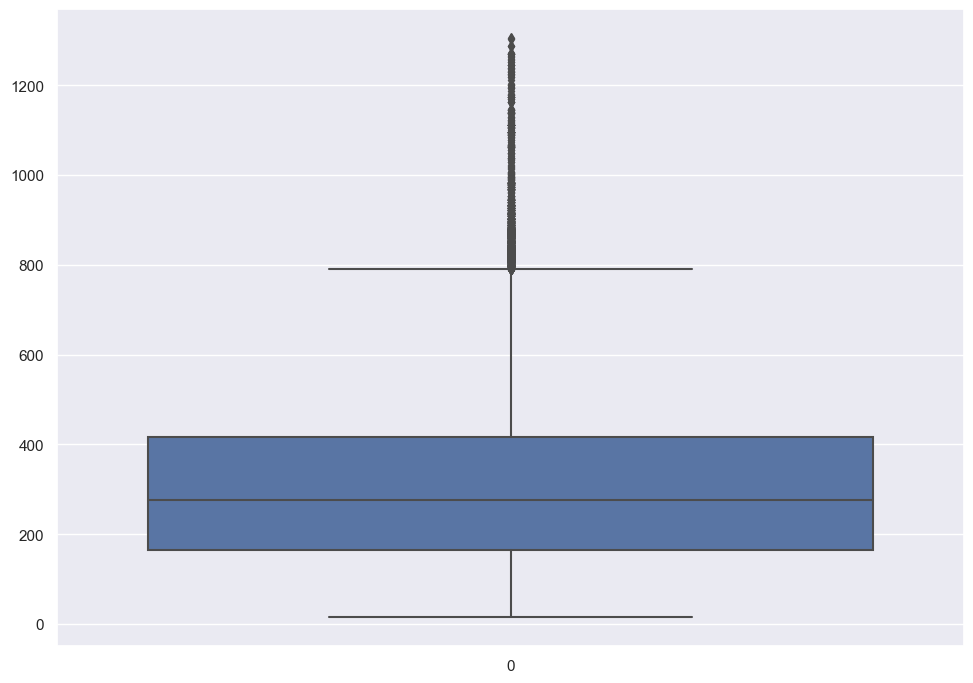

In [116]:
sns.boxplot(loan_df['installment'])

Now the data looks continous for installments

#### Plotting Box plot for loan amount 

<Axes: >

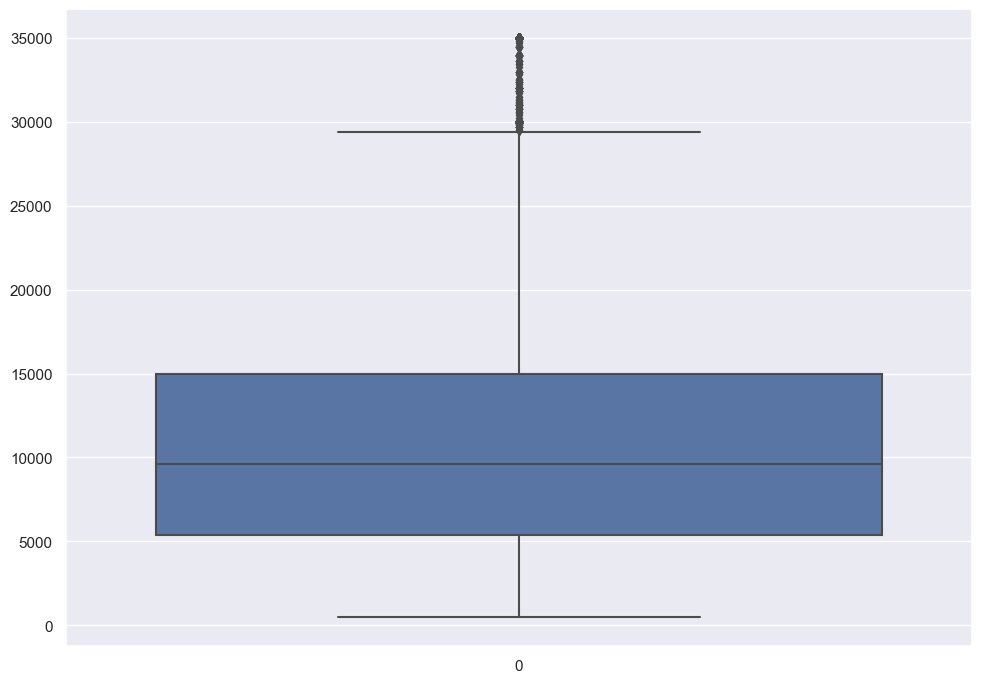

In [117]:
sns.boxplot(loan_df['loan_amnt'])

The Box plot for loan amount  looks continuous with minimum number of outliers hence not removing data

#### Plotting Box plot for funded_amnt_inv

<Axes: >

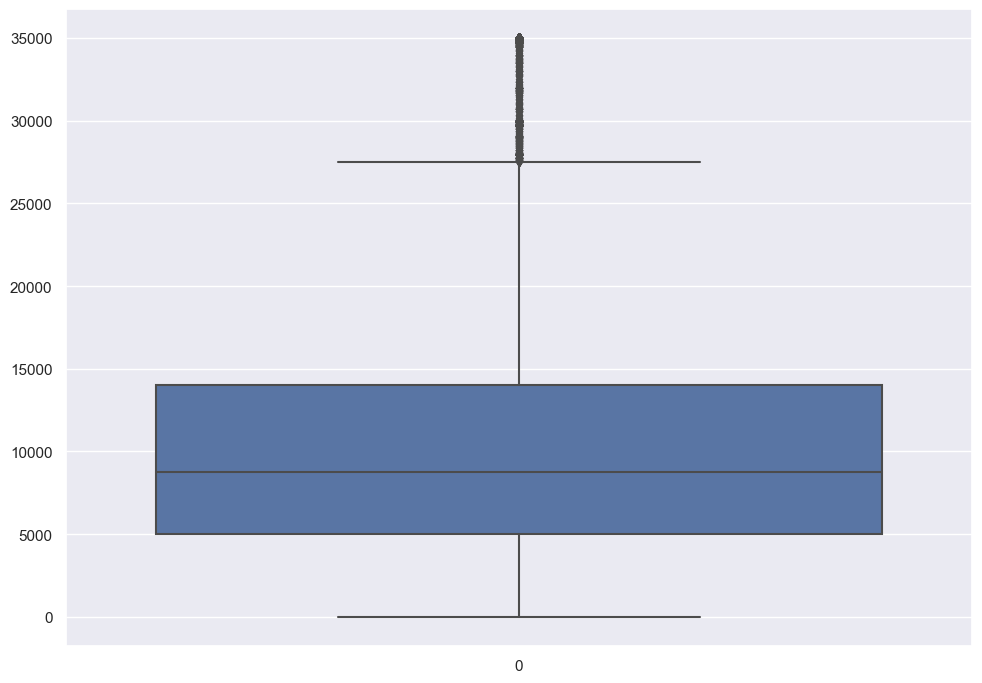

In [118]:
sns.boxplot(loan_df['funded_amnt_inv'])

The Box plot for funded_amnt_inv looks continuous with minimum number of outliers hence not removing data

#### Plotting Box plot for intrest rate

<Axes: >

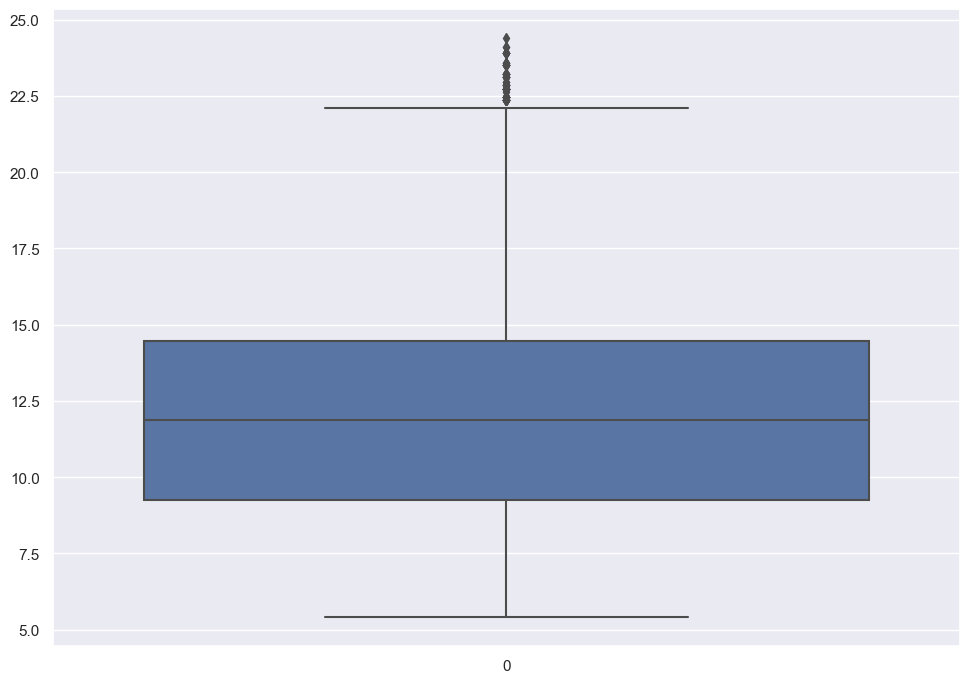

In [119]:
sns.boxplot(loan_df['int_rate'])

The Box plot for loan amount  looks continuous with minimum number of outliers hence not removing data

### Univariate Analysis

#### Visualizing Categorical Columns

##### Plotting countplot for loan status 

<Axes: xlabel='loan_status', ylabel='count'>

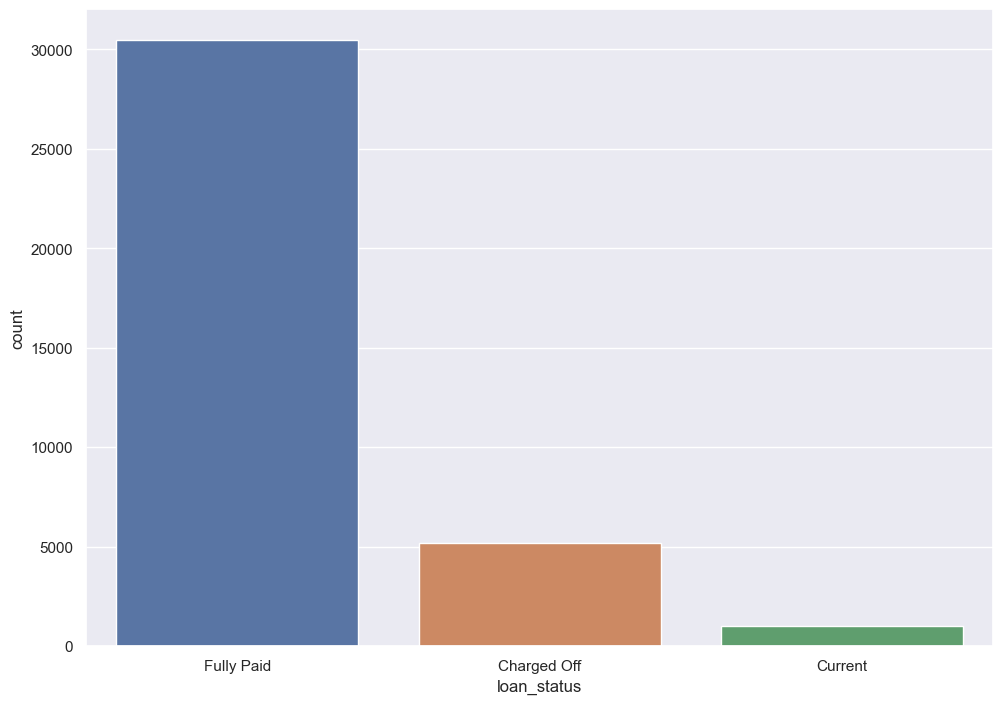

In [120]:
sns.countplot(x = 'loan_status', data = loan_df)

###### Findings 
* There are a very large number of loans that are fully paid as compared to charged off


#### Plotting countplot for grade

<Axes: xlabel='grade', ylabel='count'>

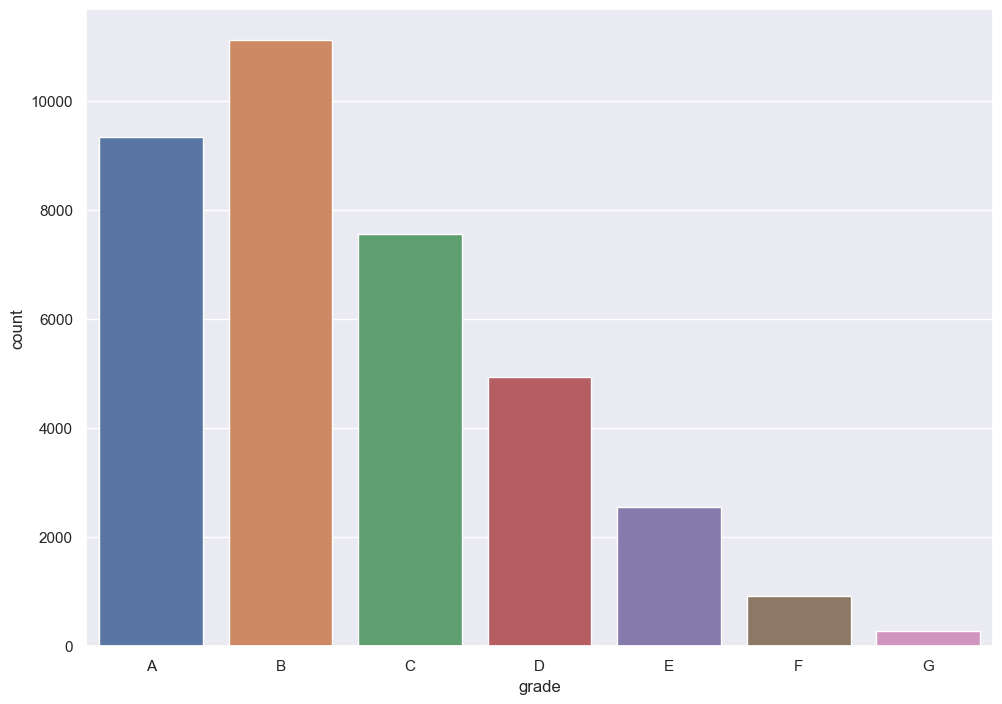

In [121]:
sns.countplot(x = 'grade', data = loan_df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

###### Findings 
* Most of the loans were given in the grade category B


#### Plotting countplot for employee length

<Axes: xlabel='emp_length', ylabel='count'>

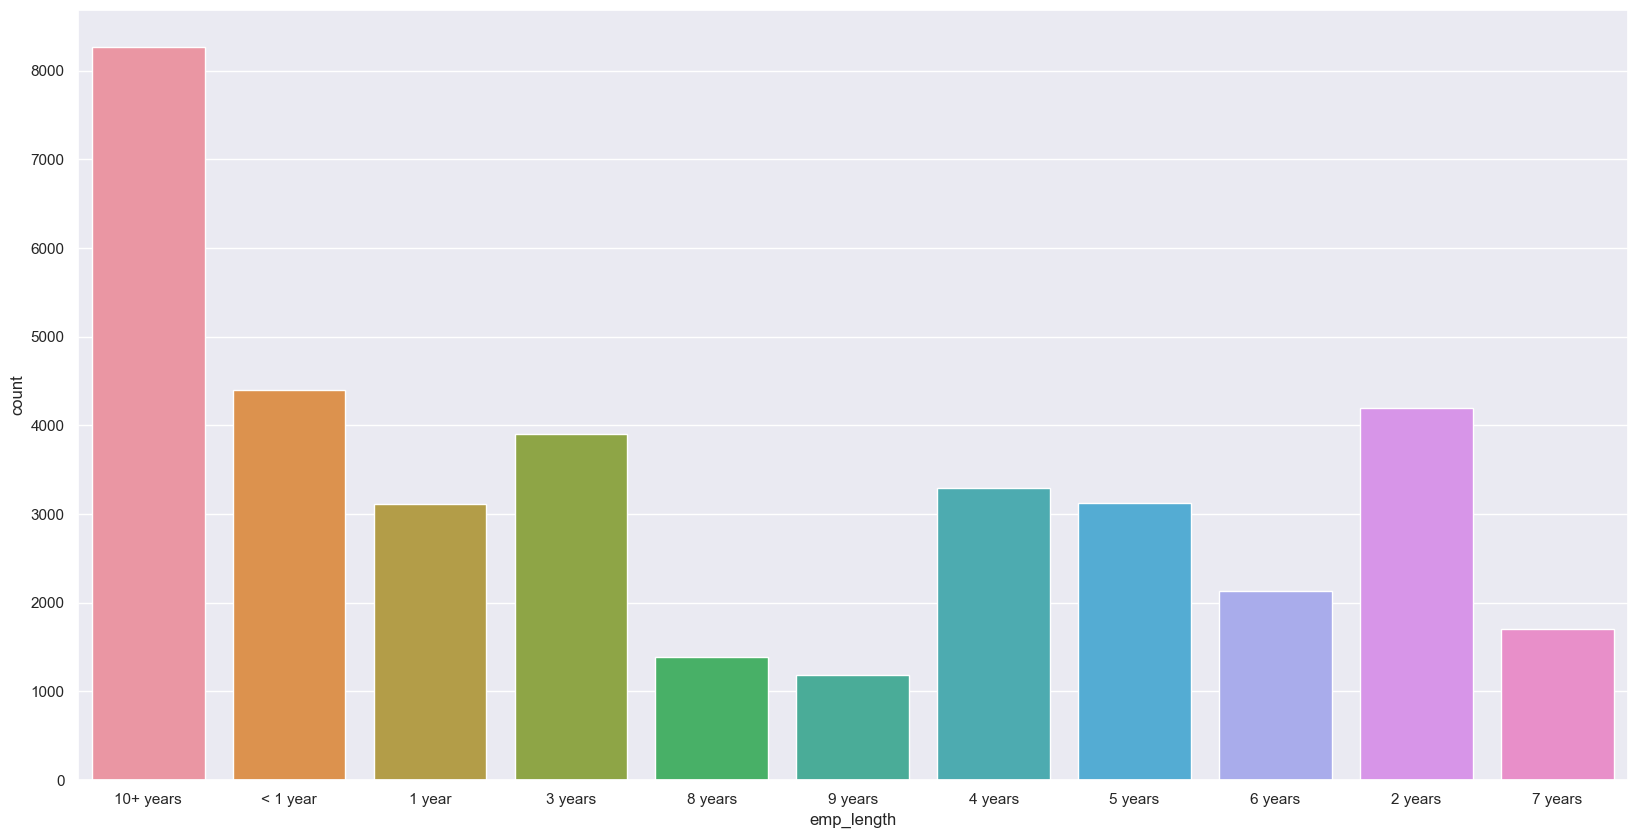

In [122]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x = 'emp_length', data = loan_df)

###### Findings 
* Most of the people who were given loan have a employee lenght greater than 10 years


#### Plotting countplot for verification_status

<Axes: xlabel='verification_status', ylabel='count'>

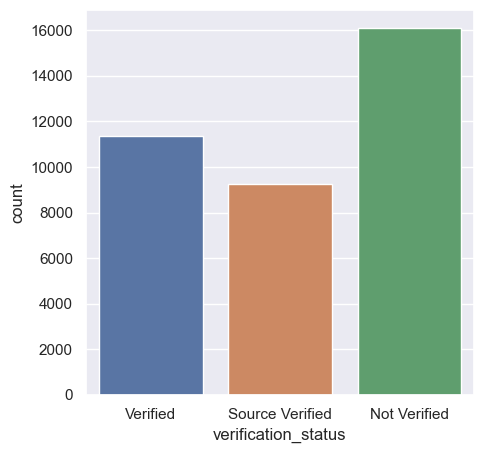

In [123]:
fig, ax = plt.subplots(figsize = (5,5))
sns.countplot(x = 'verification_status', data = loan_df)

###### Findings 
* Most of the people who were given loan have a employee lenght greater than 10 years


#### Plotting countplot for Home Ownership

In [124]:
dt['home_ownership'].value_counts()

RENT        17355
MORTGAGE    14824
OWN          2594
OTHER          88
NONE            3
Name: home_ownership, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

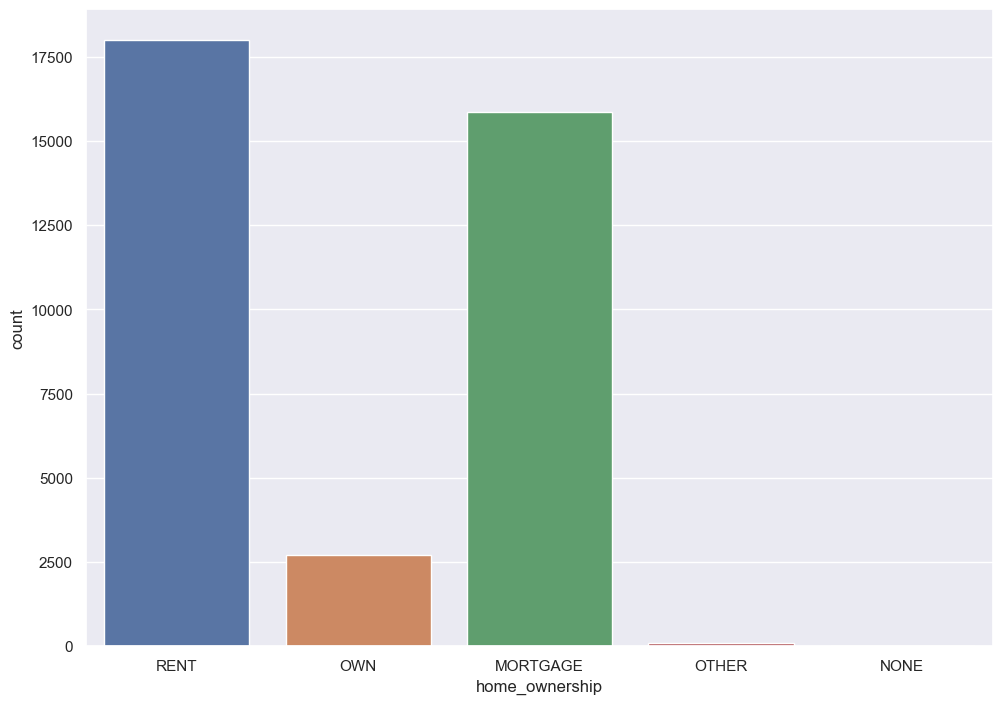

In [125]:
sns.countplot(x='home_ownership', data=loan_df)

 ###### Findings 
* Most of the people who were given a loan live on rent


#### Plotting countplot for loan purpose

<Axes: xlabel='purpose', ylabel='count'>

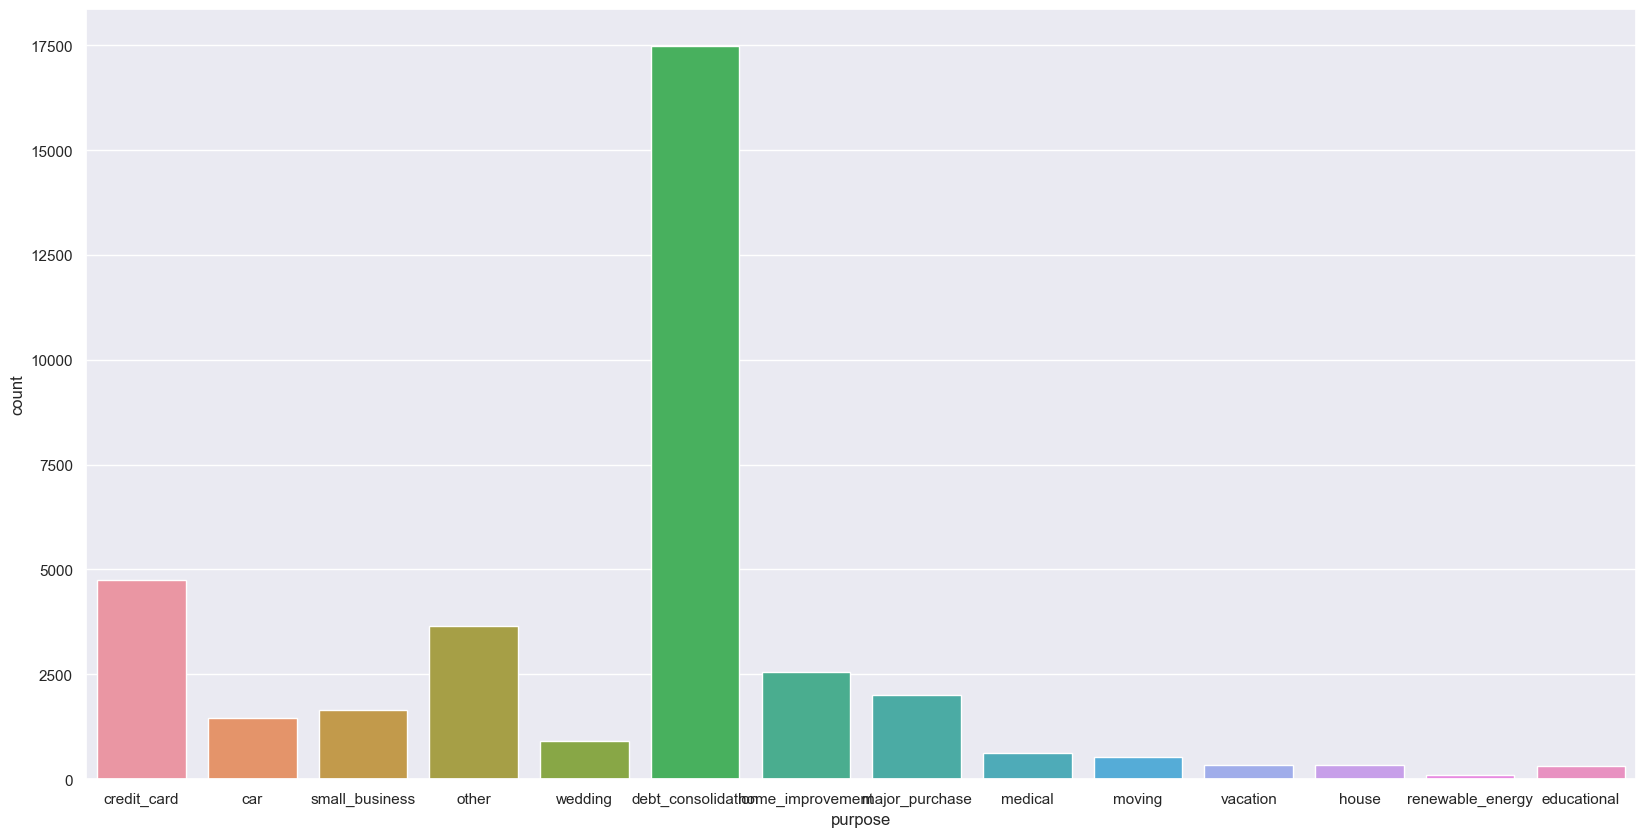

In [126]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x ='purpose', data=loan_df)

###### Findings 
* Most of loans were given to people for the debt consolidation


#### Plotting countplot for loan term

<Axes: xlabel='term', ylabel='count'>

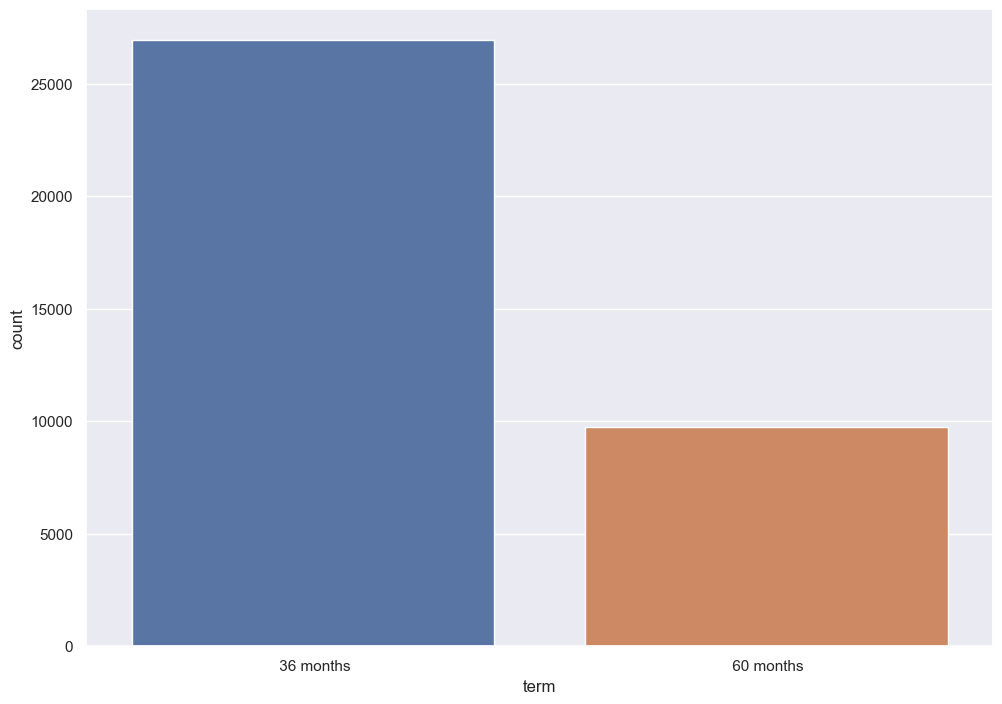

In [127]:
sns.countplot(x='term', data=loan_df)

###### Findings 
* Most of the people were given a loan for a period of 36 months


#### Analyzing Issue Date of the loan by spliting it into years and months 

<Axes: xlabel='issue_month', ylabel='count'>

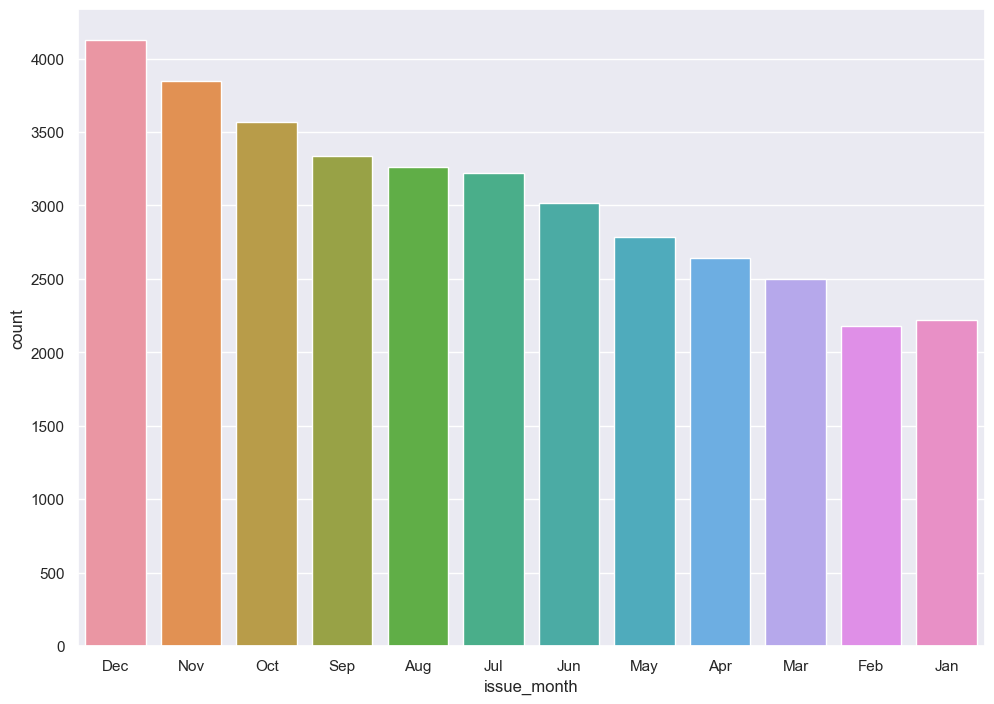

In [128]:
loan_df_month_year = loan_df['issue_d'].str.partition("-", True)
loan_df['issue_year']='20' + loan_df_month_year[2]
loan_df['issue_month']=loan_df_month_year[0]                       
sns.countplot(x='issue_month', data=loan_df)

<Axes: xlabel='issue_year', ylabel='count'>

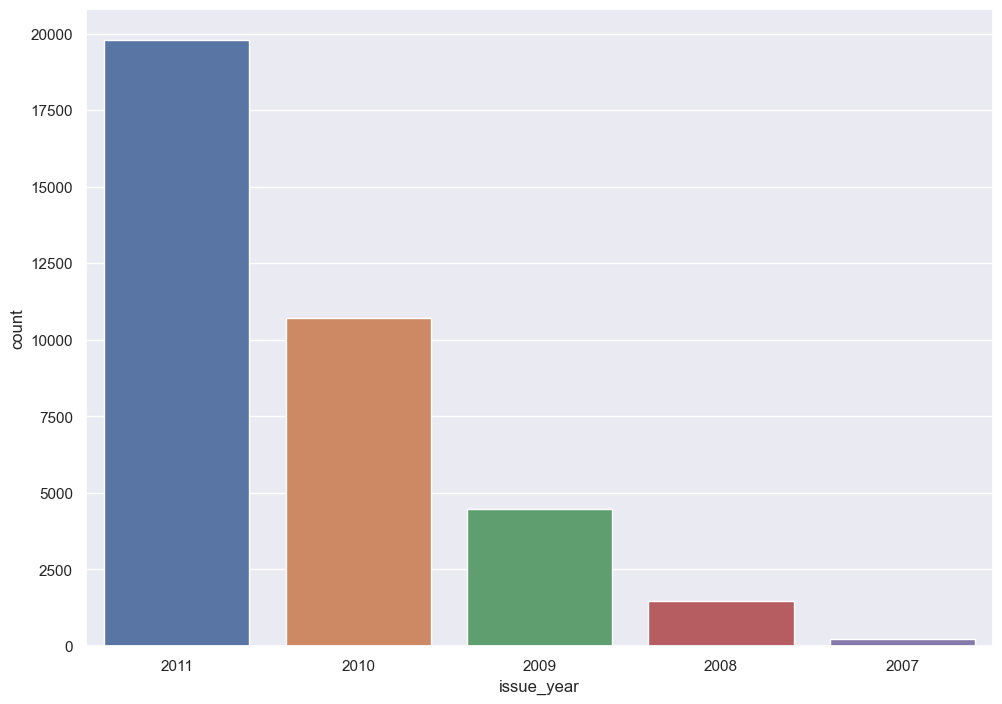

In [129]:
sns.countplot(x='issue_year', data=loan_df)

###### Findings 
* Most of the people were given a loan in the month of december
* Most of the people were given a loan for year 2011
* The number of loans gien increases as the months are incresing 


### Analysisng Numerical data

#### Analysing loan_amnt , interest rate and installments

<Axes: xlabel='loan_amnt', ylabel='Density'>

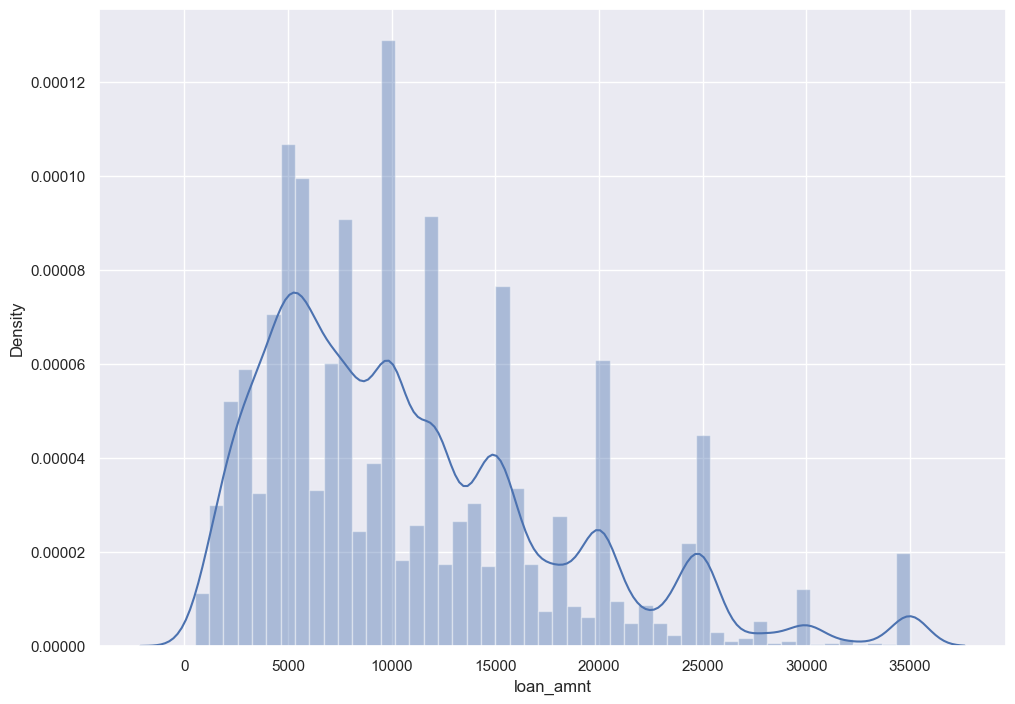

In [130]:
sns.distplot(loan_df["loan_amnt"])

<Axes: xlabel='int_rate', ylabel='Density'>

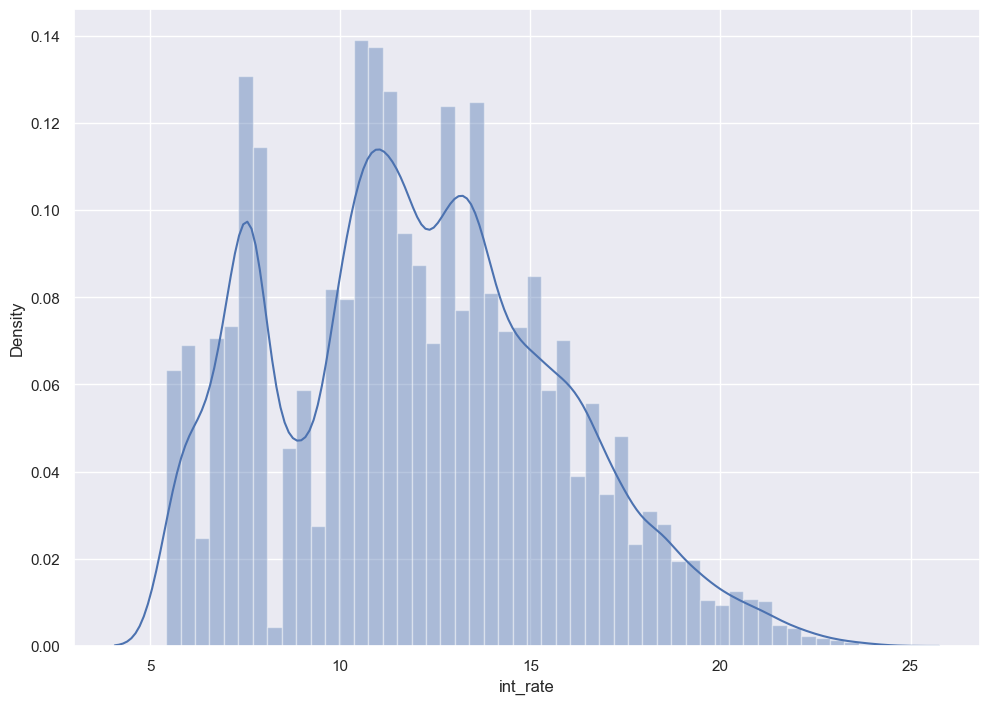

In [131]:
sns.distplot(loan_df["int_rate"] )

<Axes: xlabel='installment', ylabel='Density'>

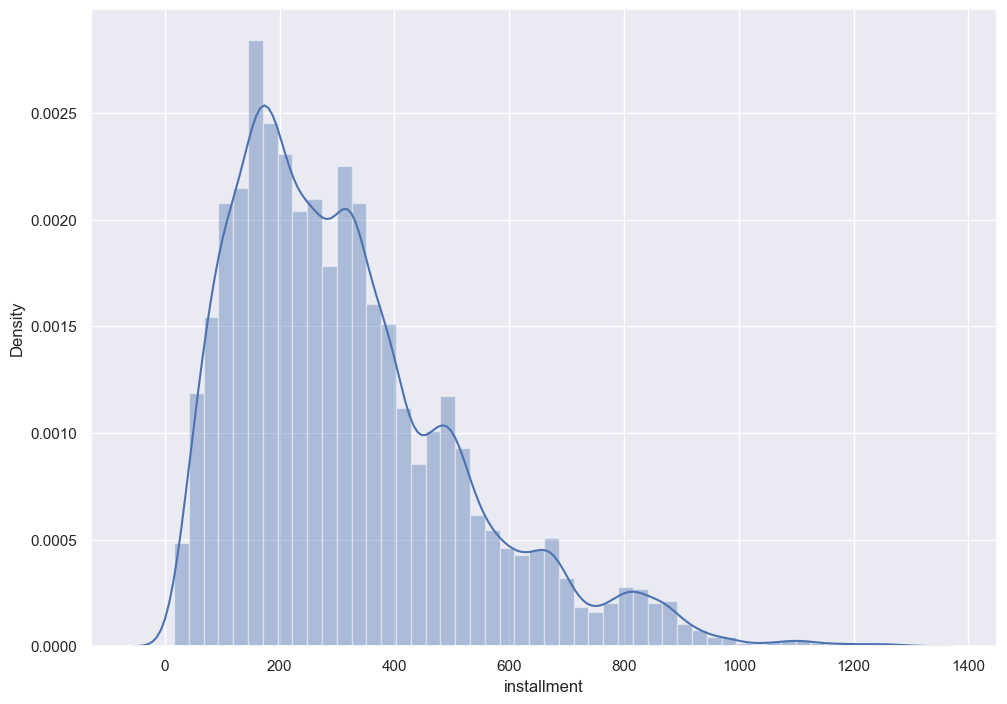

In [132]:
sns.distplot(loan_df["installment"] )

###### Findings 
* Most of the people were given a loan in the month of december
* Most of the people were given a loan for year 2011
* The number of loans gien increases as the months are incresing 


### Conclusions From Univariate Analysis
* There are a very large number of loans that are fully paid as compared to charged off 
* Most of the loans were given in the grade category B
* Most of the people who were  given a loan live on rent
* Most of loans were given to people for the debt consolidation purpose
* Most of the people were given a loan in the month of december
* Most of the people were given a loan for year 2011
* The number of loans given increases as the months are incresing 
* Most of the people were given a loan for a period of 36 months

## Bivariate Analysis

### Comparing Categorical VS Numerical Data using boxplots

#### Plotting graphs for loan status VS intrest Rate as loan status seems to be the target variable 

<Axes: xlabel='loan_status', ylabel='int_rate'>

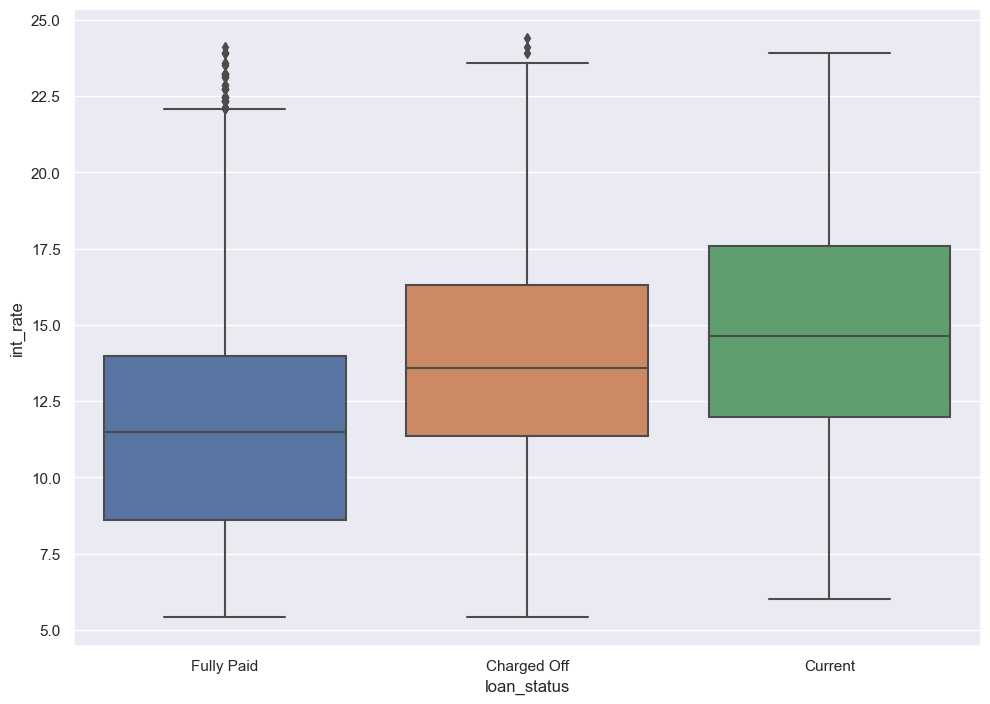

In [133]:
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=loan_df)

###### Findings 
* Most of the people who default loan have been charged a higher intrest rate


#### Plotting graphs for loan status VS annual income

<Axes: xlabel='loan_status', ylabel='annual_inc'>

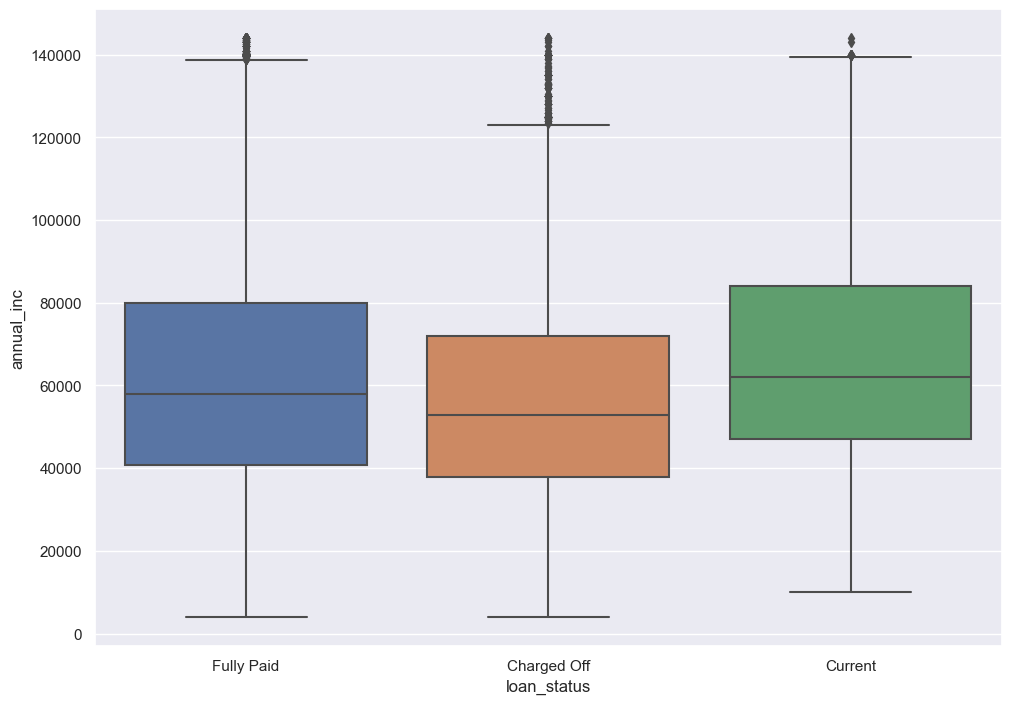

In [134]:
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=loan_df)

###### Findings 
* Most of the people who default loan have a slightly lower annual income 

#### Plotting graphs for loan status vs dti

<Axes: xlabel='loan_status', ylabel='dti'>

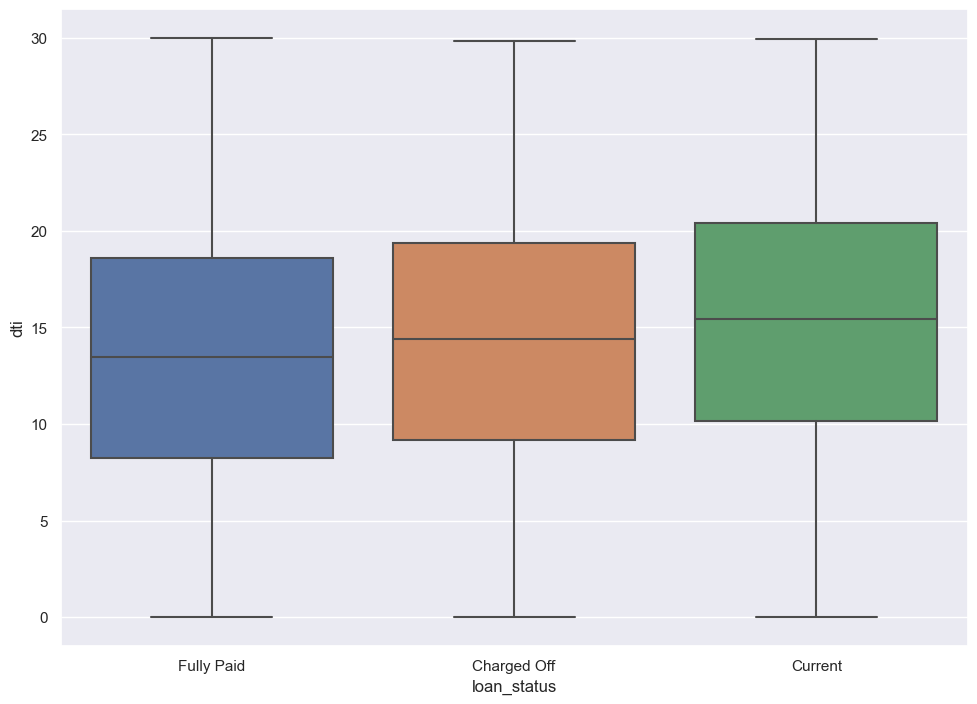

In [135]:
sns.boxplot(x = 'loan_status', y = 'dti' ,data=loan_df)

###### Findings 
* Most of the people who default loan have a slightly higher dti (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations)

#### Plotting graphs for loan status vs verification_status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

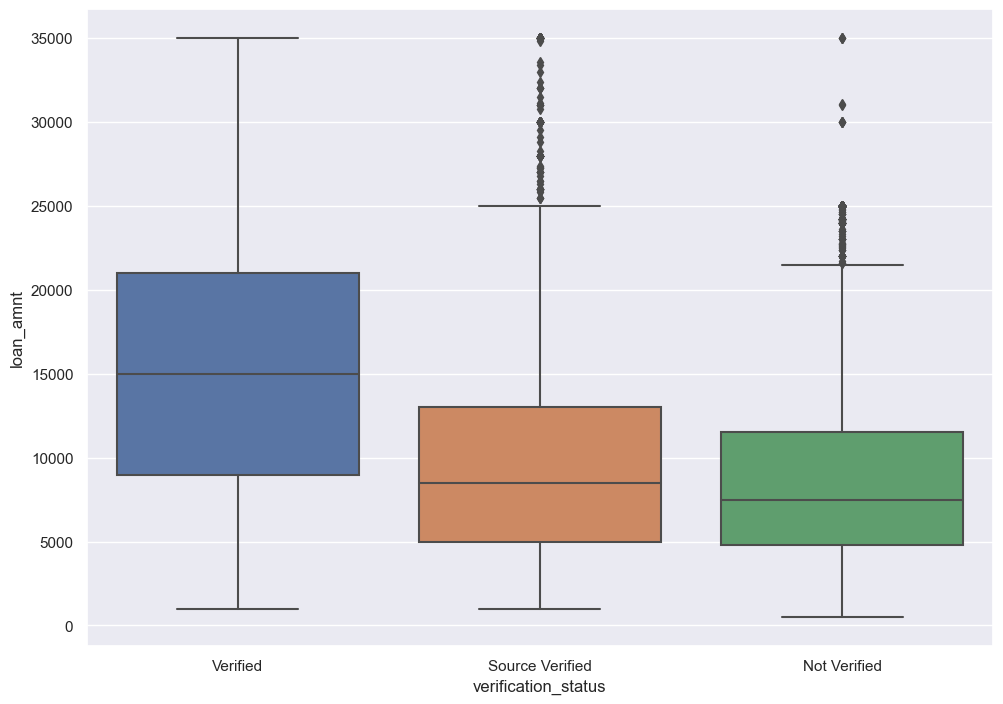

In [136]:
sns.boxplot( x="verification_status",y="loan_amnt", data=loan_df)

###### Findings 
* People who were verified were given a higher loan amount

### Comparing other values with loan status

#### comparing annual income vs loan purpose

<Axes: xlabel='purpose', ylabel='annual_inc'>

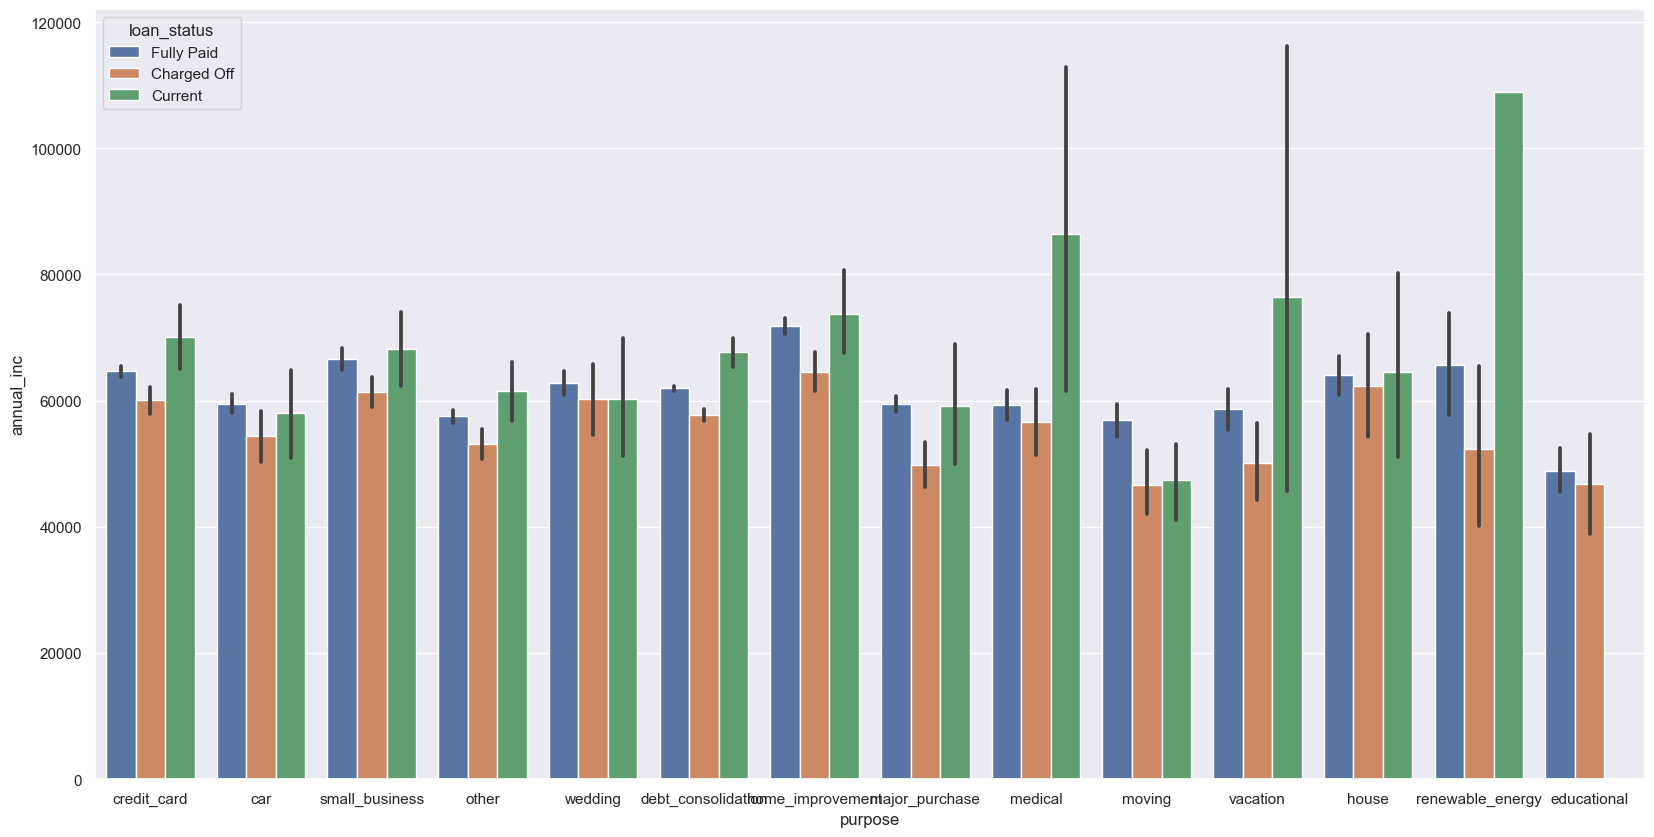

In [137]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data =loan_df,y='annual_inc', x='purpose', hue ='loan_status')

###### Findings 
*The loan takers higher annual incomes are being spent onrenewable_energy, home_improvment,small_businesses and house

#### comparing loan amnt vs loan purpose

<Axes: xlabel='purpose', ylabel='loan_amnt'>

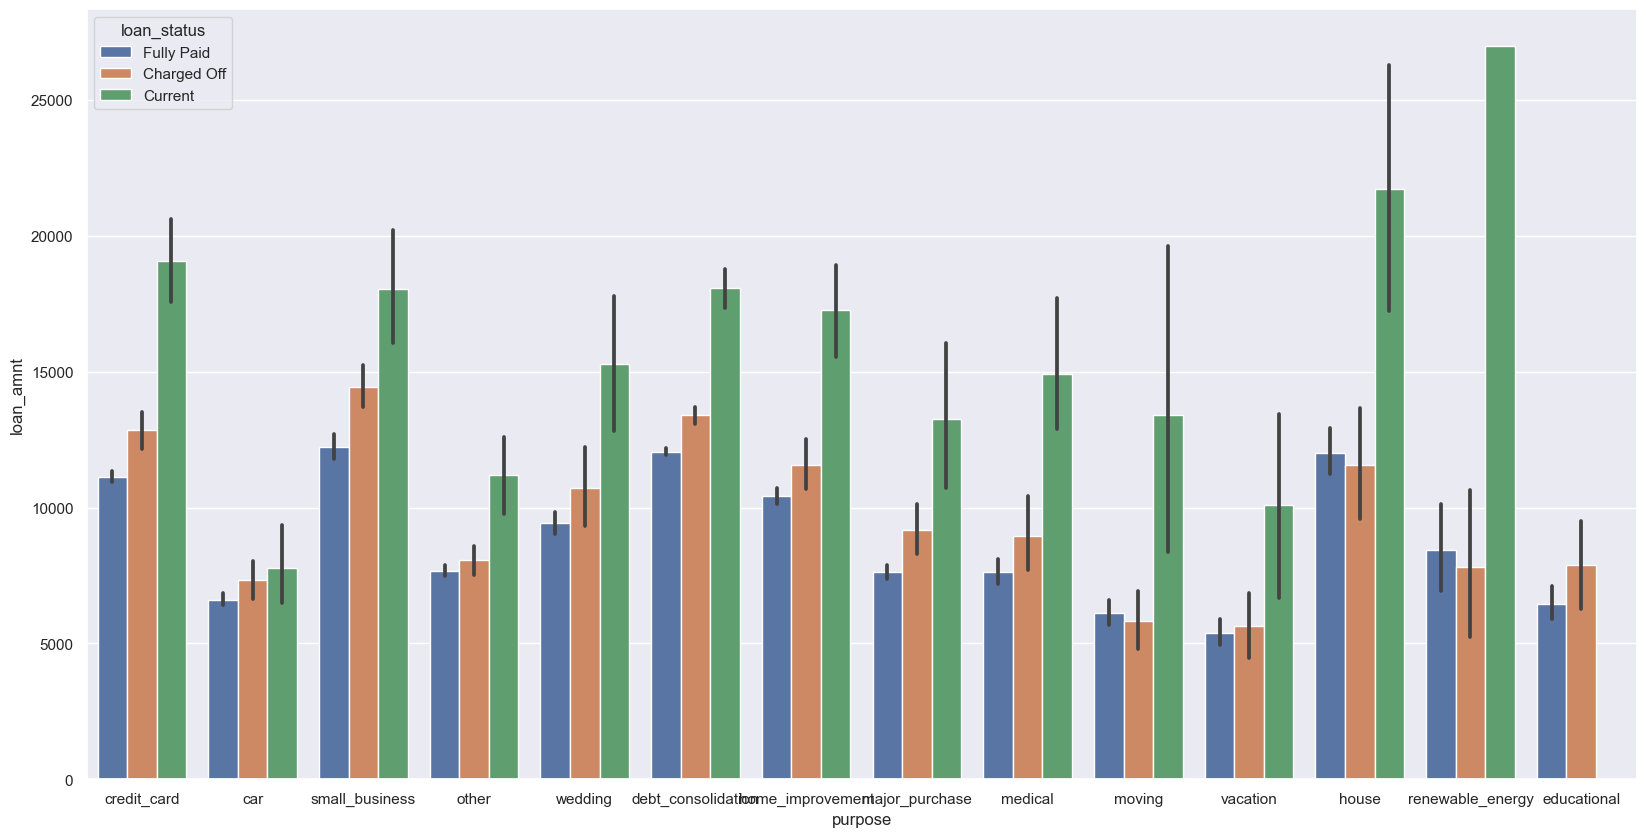

In [138]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data =loan_df,y='loan_amnt', x='purpose', hue ='loan_status')

###### Findings 
* From the above graph we can conclude that the maximum loan were charged off in the following categories credit card , small business, debt consolidation and house 
* Credit card and debt consolidation being the major risky sectors for giving out the loan

#### Plotting a graph for year and month vs the loan status

<Axes: xlabel='issue_month', ylabel='loan_amnt'>

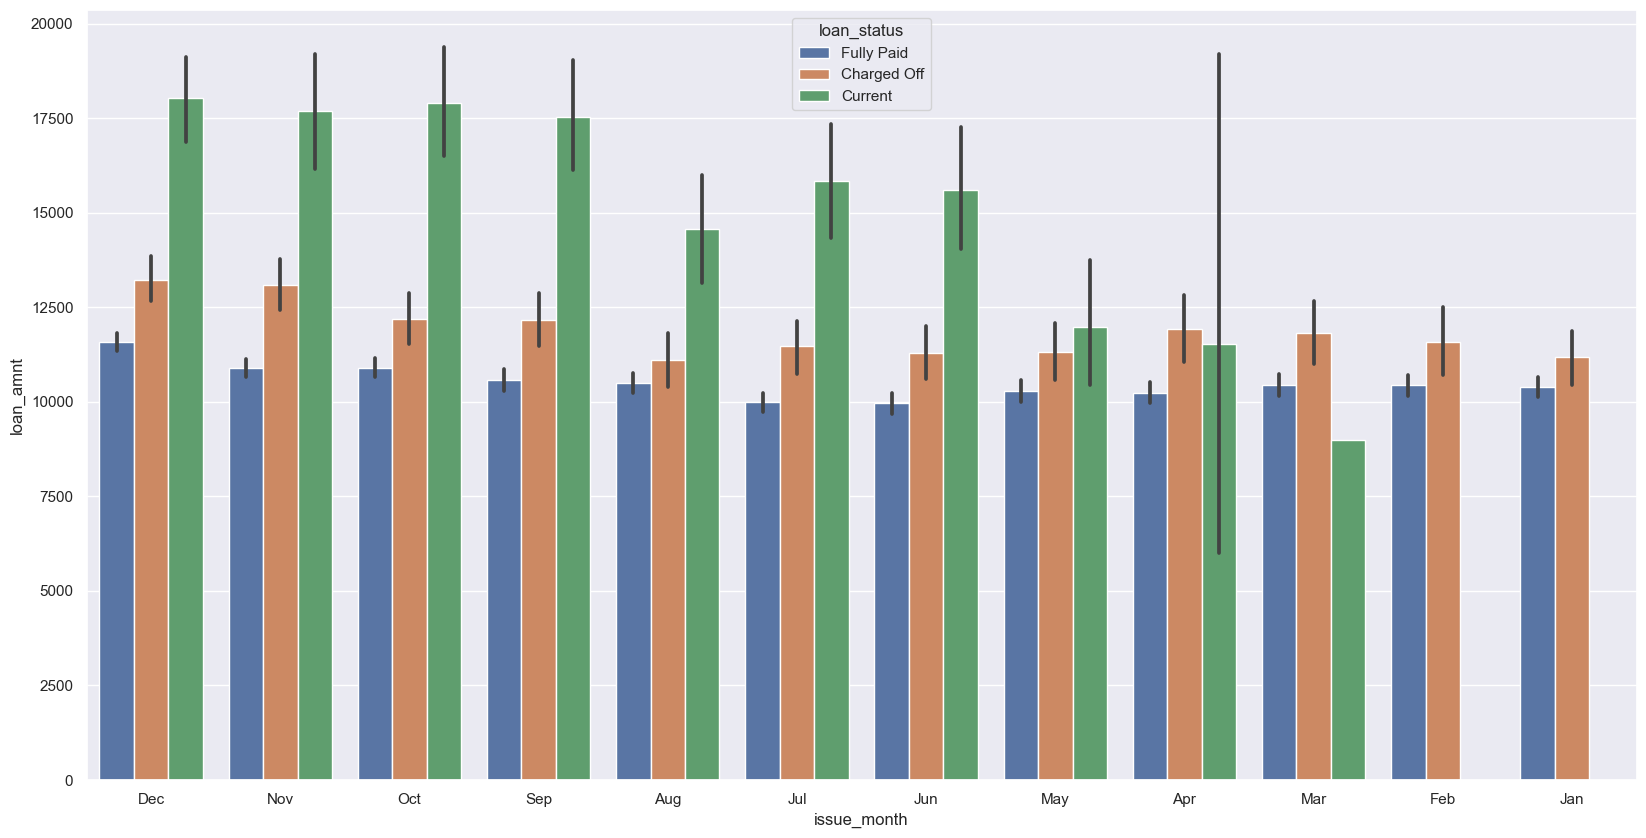

In [139]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data =loan_df,y='loan_amnt', x='issue_month', hue ='loan_status')

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

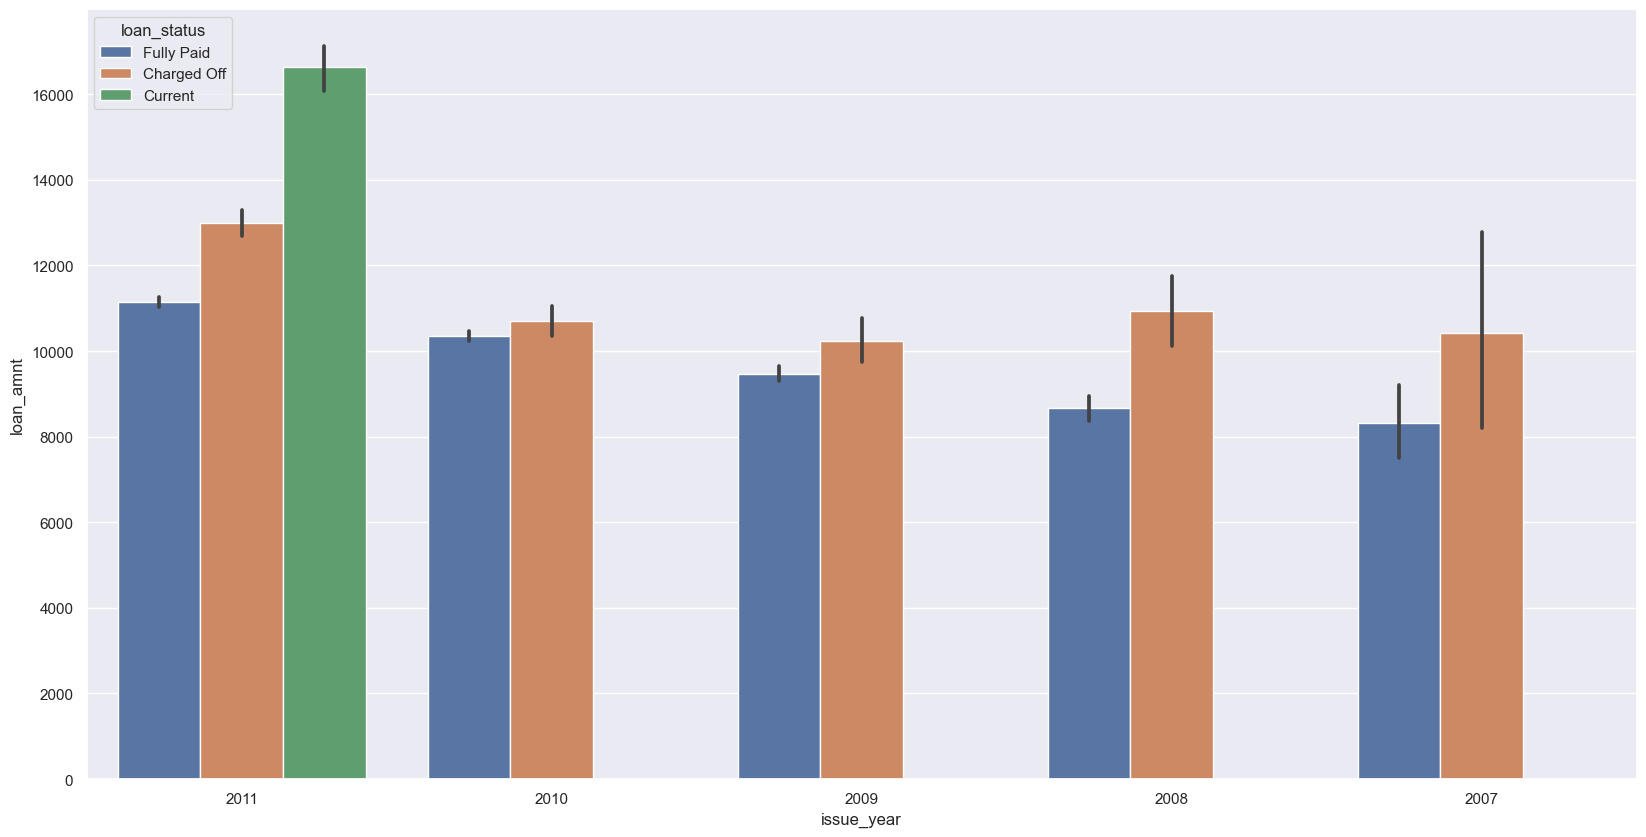

In [140]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data =loan_df,y='loan_amnt', x='issue_year', hue ='loan_status')

###### Findings 
* From the above graphs we can conclude that most of the defaults happened in the later months of the year like sep, out, nov, dec 
* From the year vs the loan status graph we can conclude that a high number of loans were charged off in the year 2011

#### Plotting a graph for loan amount vs grade 

<Axes: xlabel='grade', ylabel='loan_amnt'>

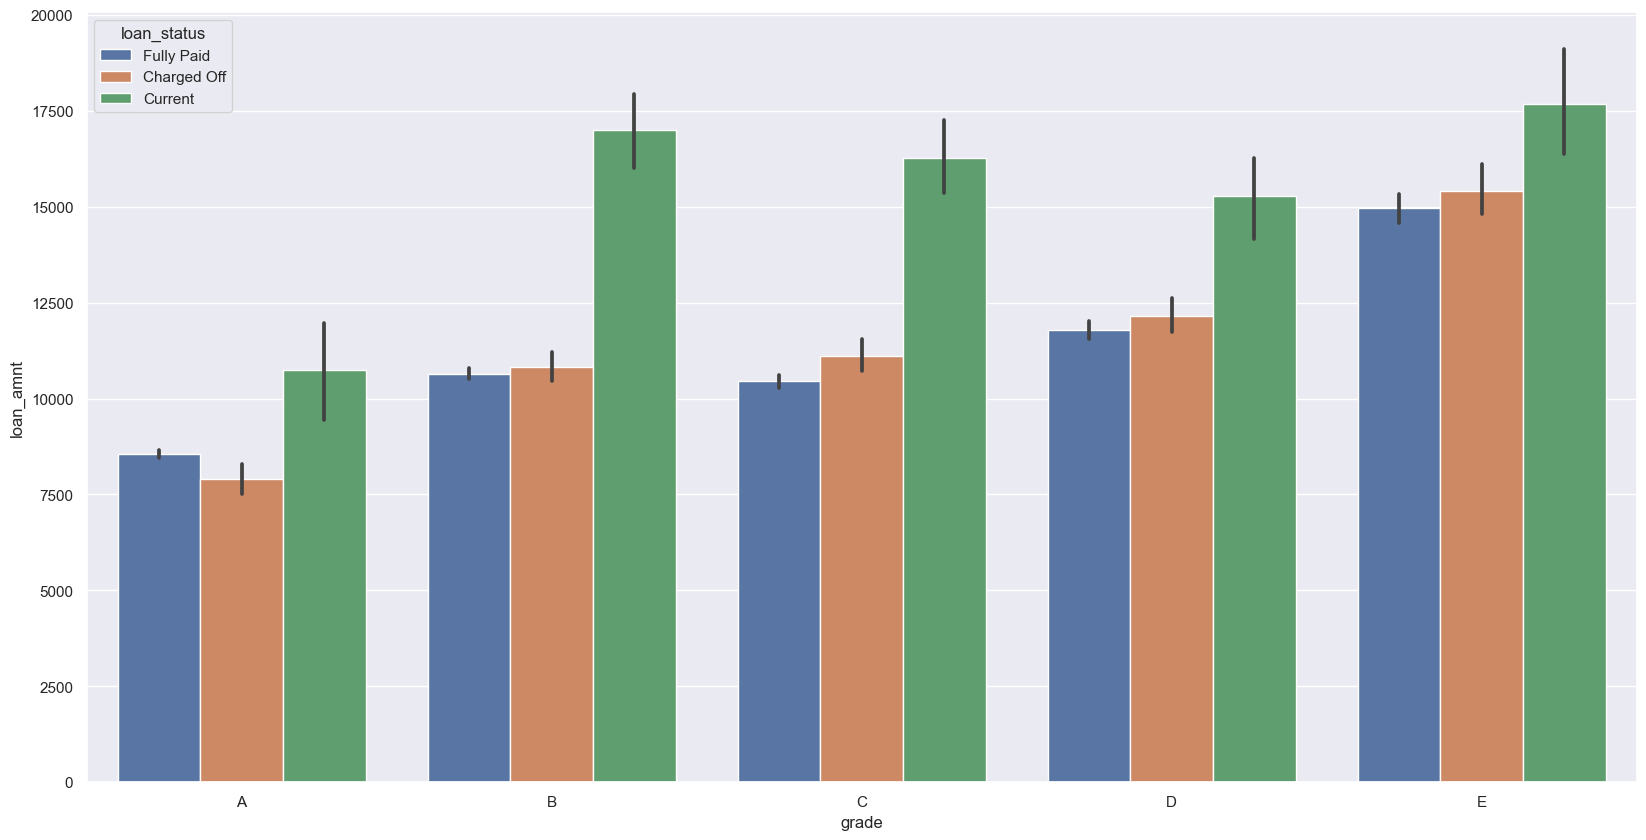

In [141]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data =loan_df,y='loan_amnt', x='grade', hue ='loan_status', order=['A','B','C','D','E'])

###### Findings 
* From the above graphs we can conclude that people with grade E have a higher loan amount sanctioned

### Converting the Loan Status our target variable to a int for the further risk comparisions

In [142]:
loan_df['loan_status'] = loan_df['loan_status'].astype('category')
loan_df = loan_df[loan_df.loan_status != 'Current']
loan_df.loan_status.value_counts()
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

### Plotting Grade vs the loan status distribution 

0    30497
1     5187
Name: loan_status, dtype: int64

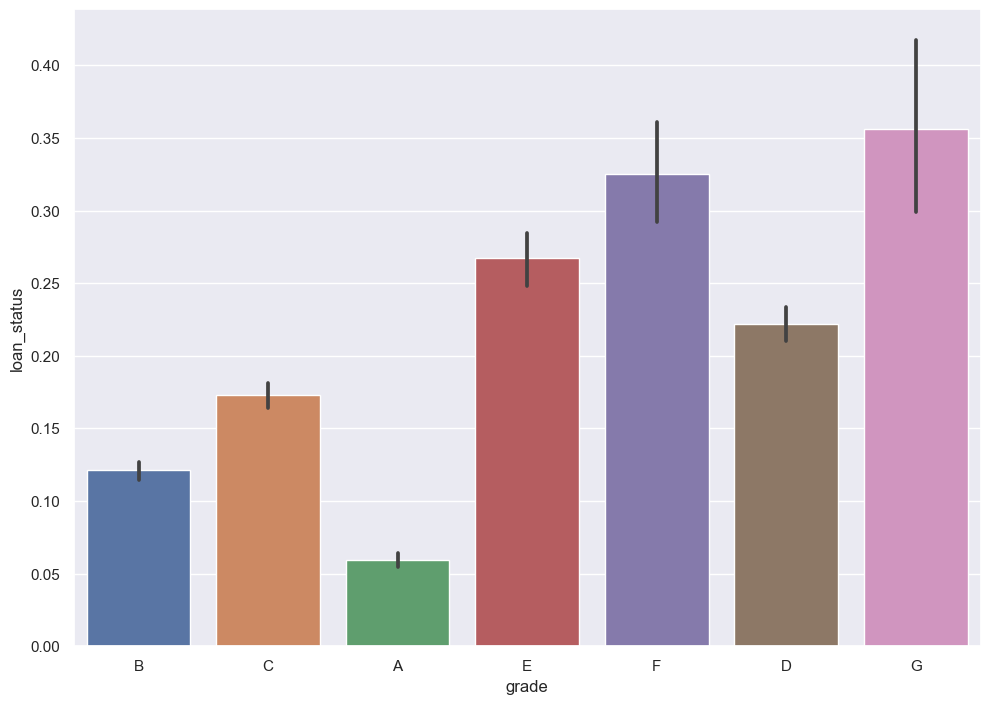

In [143]:
sns.barplot(x='grade', y='loan_status', data=loan_df)
loan_df['loan_status'].value_counts()

###### Findings 
* From the above graphs we can conclude that grade G and F loans are the most risky loans to be given 

### Plotting Sub Grade vs the loan status distribution 

<Axes: xlabel='sub_grade', ylabel='loan_status'>

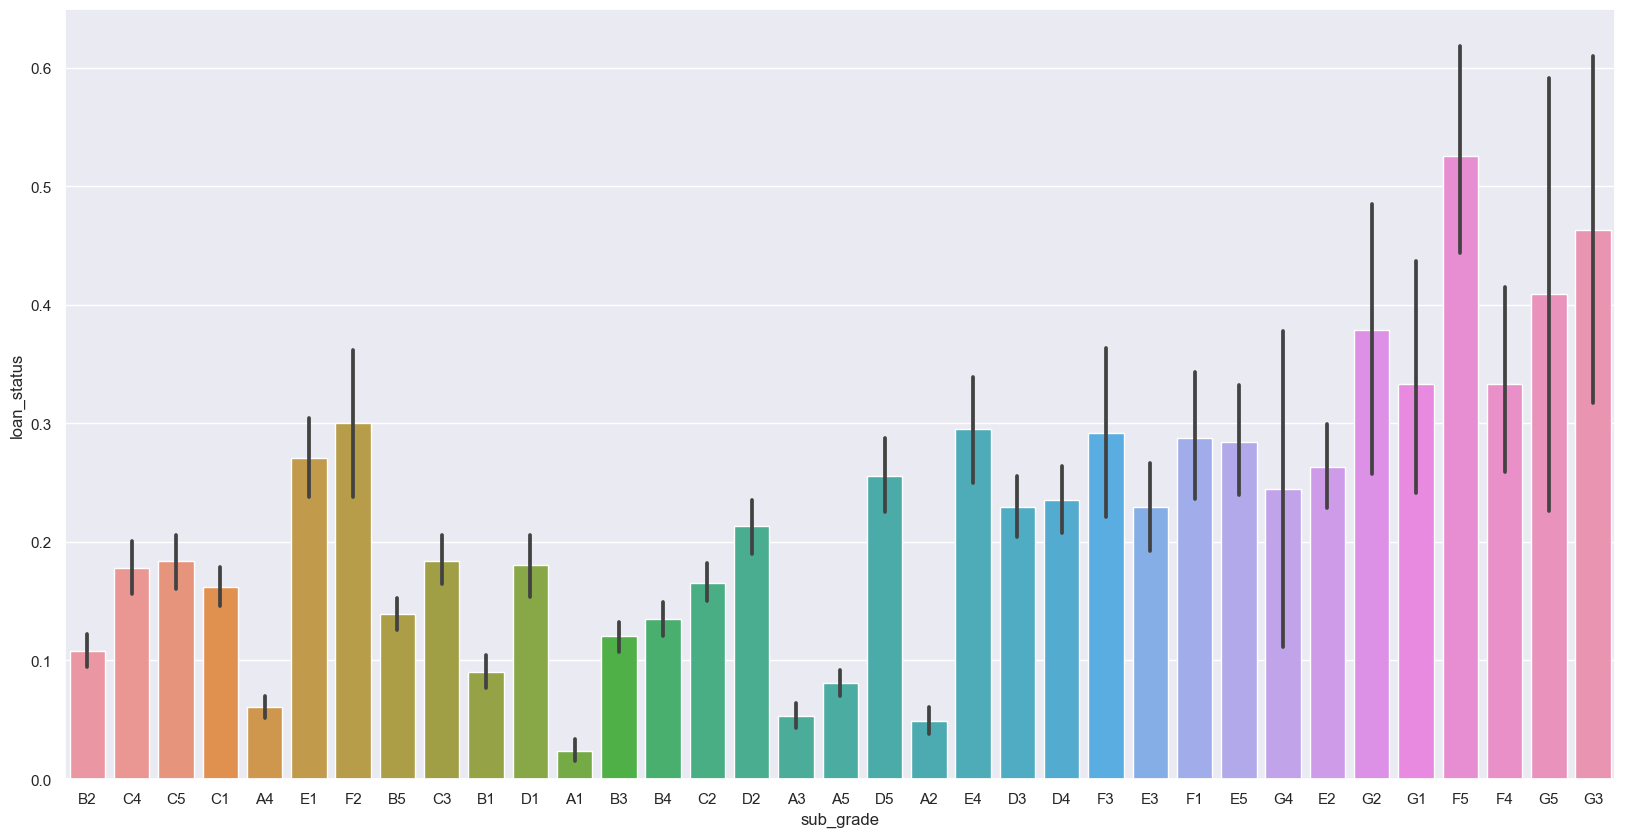

In [144]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x='sub_grade', y='loan_status', data=loan_df)


###### Findings 
* From the above graph we can conclude that Risk increases as the sub grade of loan inccreases example A1 A2 A3 so on

### Lets do a segmented analysis for a relation between the annual income and the loan status 

In [145]:
def cat_annual_income(n):
    if n <= 60000:
        return 'low'
    elif n > 60000 and n <=120000:
        return 'medium'
    elif n > 120000 and n <=175000:
        return 'high'
    else:
        return 'very high'

loan_df['annual_inc'] = loan_df['annual_inc'].apply(lambda x: cat_annual_income(x))

<Axes: xlabel='annual_inc', ylabel='loan_status'>

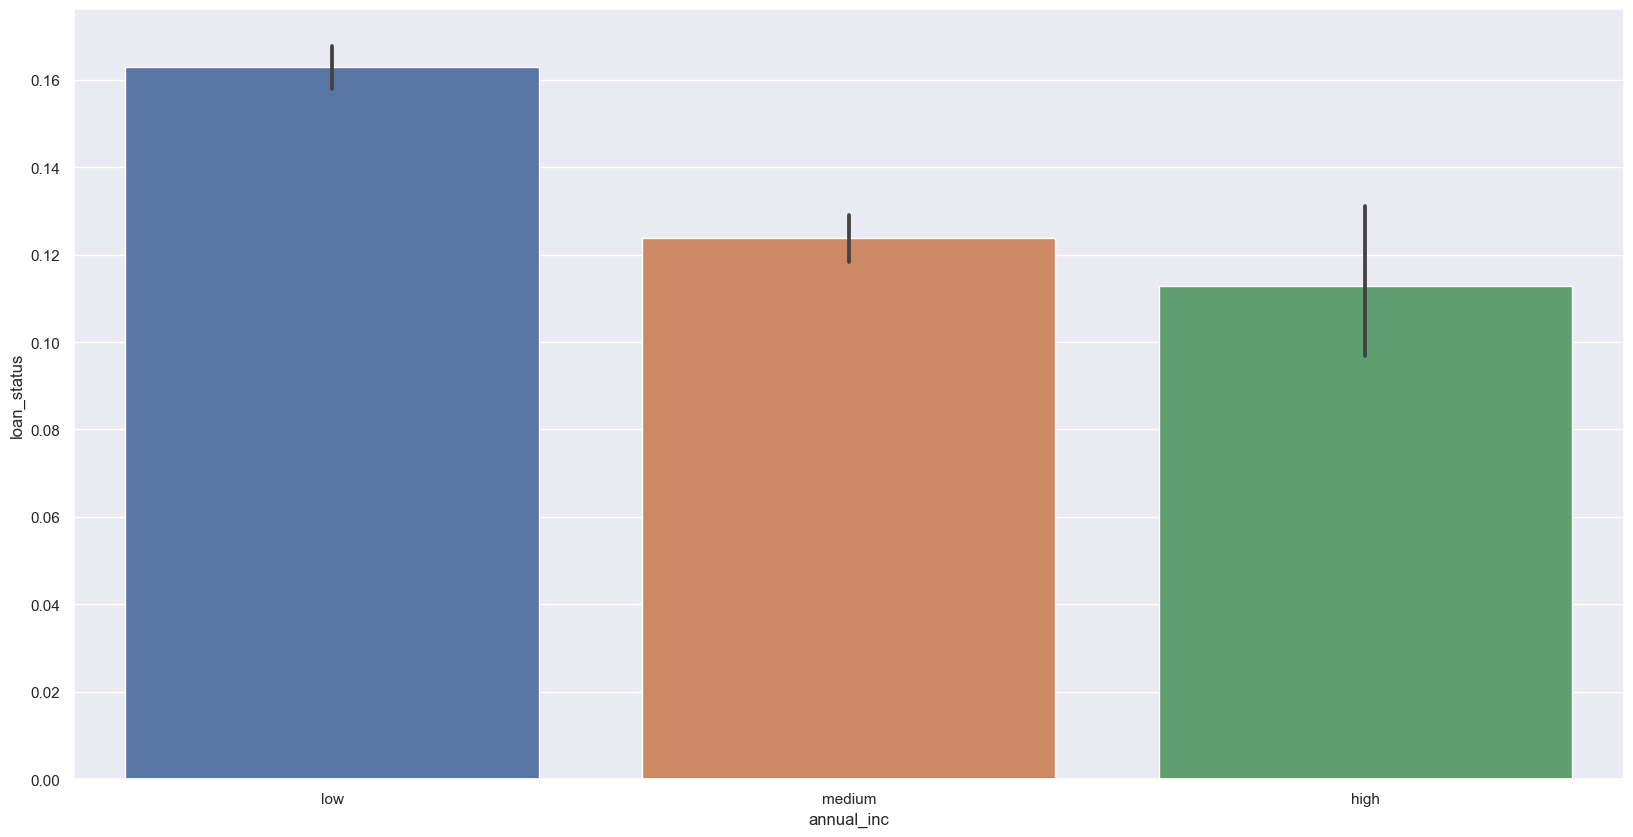

In [146]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x='annual_inc', y='loan_status', data=loan_df)


###### Findings 
* Lower the annual income is higher is the risk for the loan defaults 

### Lets do a segmented analysis for a relation between the interest rate and the loan status 

In [147]:
def catagorical_int_rate(n):
    if n <= 15:
        return 'low'
    elif n > 15 and n <=20:
        return 'medium'
    else:
        return 'high'
    
    
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: int_rate(x))

<Axes: xlabel='int_rate', ylabel='loan_status'>

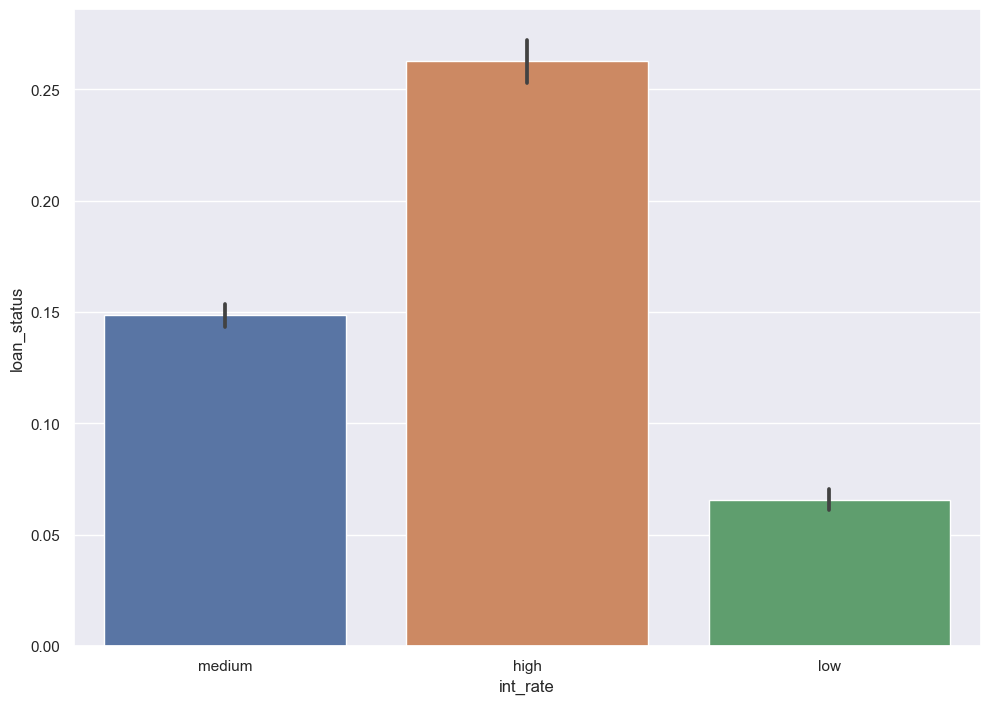

In [148]:
sns.barplot(x='int_rate', y='loan_status', data=loan_df)

###### Findings 
* High Interest Rates have a higher probablity of the defaults

### Checking the co-relation between All the numerical values

In [149]:
loan_corelation= dt.corr()

<Axes: >

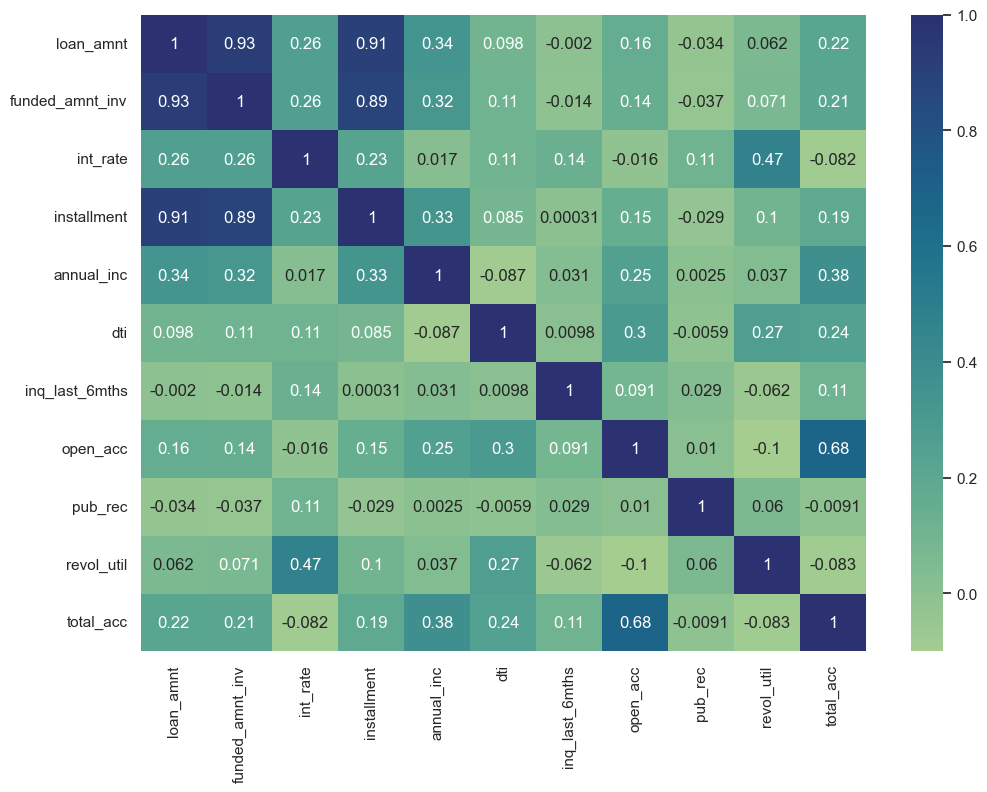

In [150]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(loan_corelation,annot=True, cmap="crest")

###### Findings 
* Open accounts is positively corelated with the total accounts
* Installment is positively corelated with the loan_amnt and funded_amnt_inv


### Experimental: Comparing address state data with the loan status 

<Axes: xlabel='addr_state', ylabel='loan_status'>

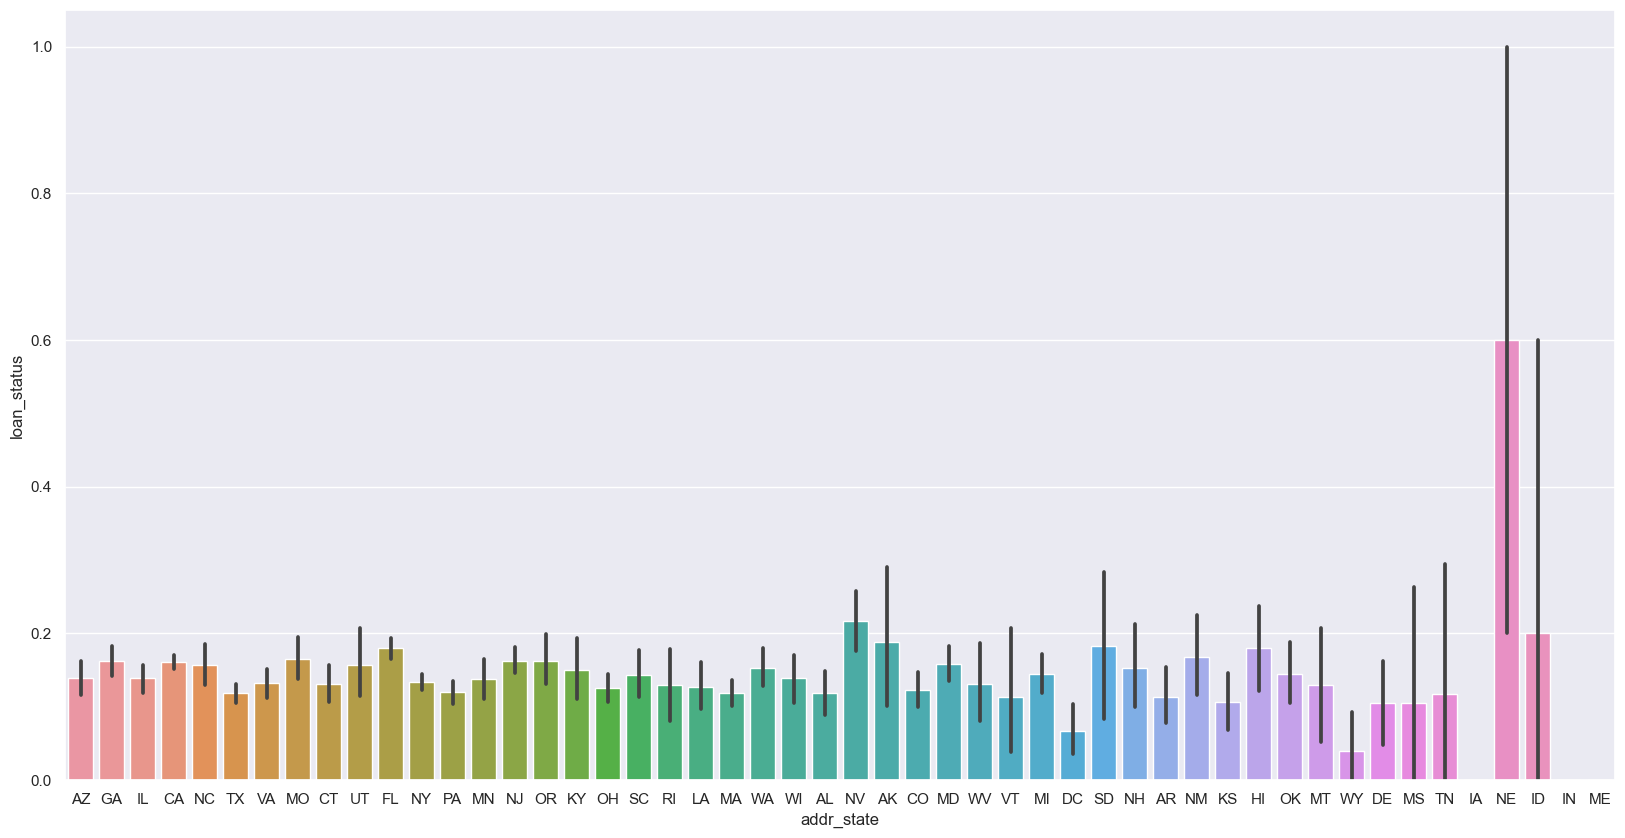

In [152]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x='addr_state', y='loan_status', data=loan_df)

###### Findings 
* We see a High Number of defaults from states like NE,ID,and NV, Where NE being the extremely highest


# Conclusions

## Insights 

### Univariate Analysis
* There are a very large number of loans that are fully paid as compared to charged off 
* Most of the loans were given in the grade category B
* Most of the people who were  given a loan live on rent
* Most of loans were given to people for the debt consolidation purpose
* Most of the people were given a loan in the month of december
* Most of the people were given a loan for year 2011
* The number of loans given increases as the months are incresing 
* Most of the people were given a loan for a period of 36 months

### Segmented Univariate Analysis
* Lower the annual income is higher is the risk for the loan defaults 
* High Interest Rates have a higher probablity of the defaults

### Bivariate Analysis
* Most of the people who default loan have been charged a higher intrest rate
* Most of the people who default loan have a slightly lower annual income 
* Most of the people who default loan have a slightly higher dti (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations)
* People who were verified were given a higher loan amount
* The loan takers higher annual incomes are being spent on renewable_energy,home_improvment,small_businesses and house
* From the above graph we can conclude that the maximum loan were charged off in the following categories credit card , small business, debt consolidation and house 
* Credit card and debt consolidation being the major risky sectors for giving out the loan
* Most of the defaults happened in the later months of the year like sep, out, nov, dec 
* A high number of loans were charged off in the year 2011
* People with grade E have a higher loan amount sanctioned
* Grade G and F loans are the most risky loans to be given 
* Risk increases as the sub grade of loan inccreases example A1 A2 A3 so on
* Open accounts is positively corelated with the total accounts
* Installment is positively corelated with the loan_amnt and funded_amnt_inv
* We see a High Number of defaults from states like NE,ID,and NV, Where NE being the extremely highest

### Recommendations

The following factors highly determine the loan defauting outcomes 
 * Interest Rate 
 * Annual Income 
 * DTI
 * Verification Status


Other Factors affecting the loan outcomes 
* Grade G and F loans are the most risky loans to be given
* Most of the defaults happened in the later months of the year like sep, out, nov, dec
* Credit card and debt consolidation being the major risky sectors for giving out the loan
* We see a High Number of defaults from states like NE,ID,and NV, Where NE being the extremely highest
* Risk increases as the sub grade of loan increases example A1 A2 A3 so on
* Most of the people who default loan have been charged a higher interest rate
* Most of the people who default loan have a slightly lower annual income